In [104]:
library(tidyverse)
library(nycflights13)
library(ggbeeswarm)
library(lvplot)
library(ggstance)

## EDA
### 1. 데이터에 대한 질문
### 2. 데이터를 시각화, 변형 및 모델링
### 3. 질문을 개선, 새로운 질문을 

## - 질문
### 1.  변수 내에서 어떤 유형의 변동이 발생하는가?
### 2. 변수 간에 어떤 유형의 공변동이 발생하는가?

- 변수 : 측정할 수 있는 양, 질 또는 속성
- 값 : 변수가 측정될 때의 상태
- 관측값 : 유사한 조건에서 측정된 값들의 집합 
- 테입블 형식의 데이터(Tabular data) : 각 변수들과 관측값의 조합인 값들의 집합 

## 변동 : 변수의 측정값이 변하는 경향

### 분포 시각화

In [2]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


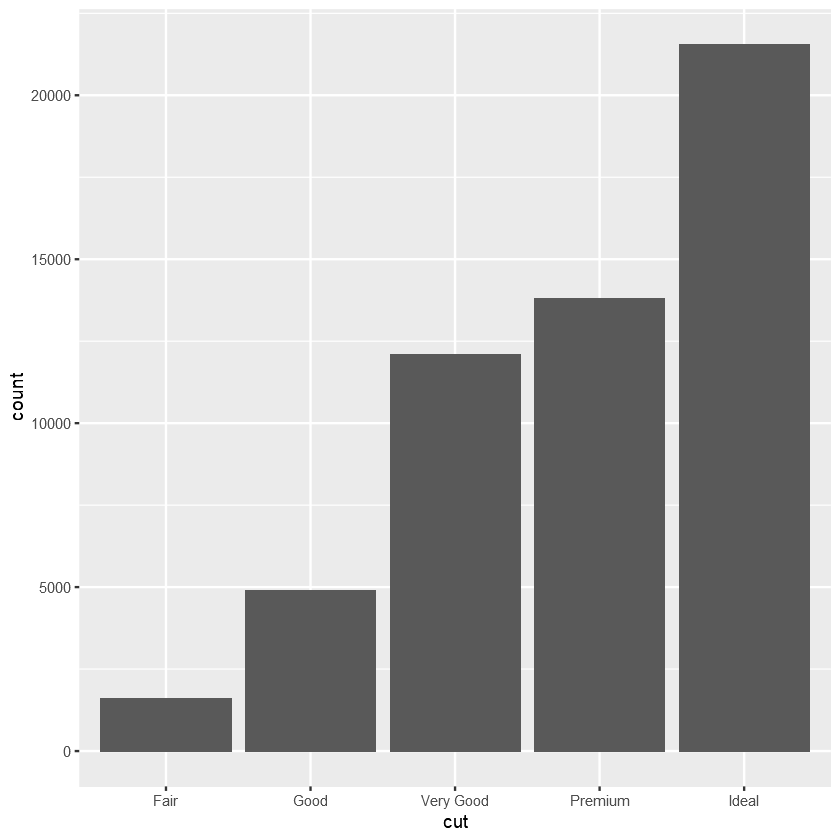

In [7]:
# 범주형 변수 빈도
ggplot(diamonds) + geom_bar(aes(x = cut))

In [8]:
diamonds %>% count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


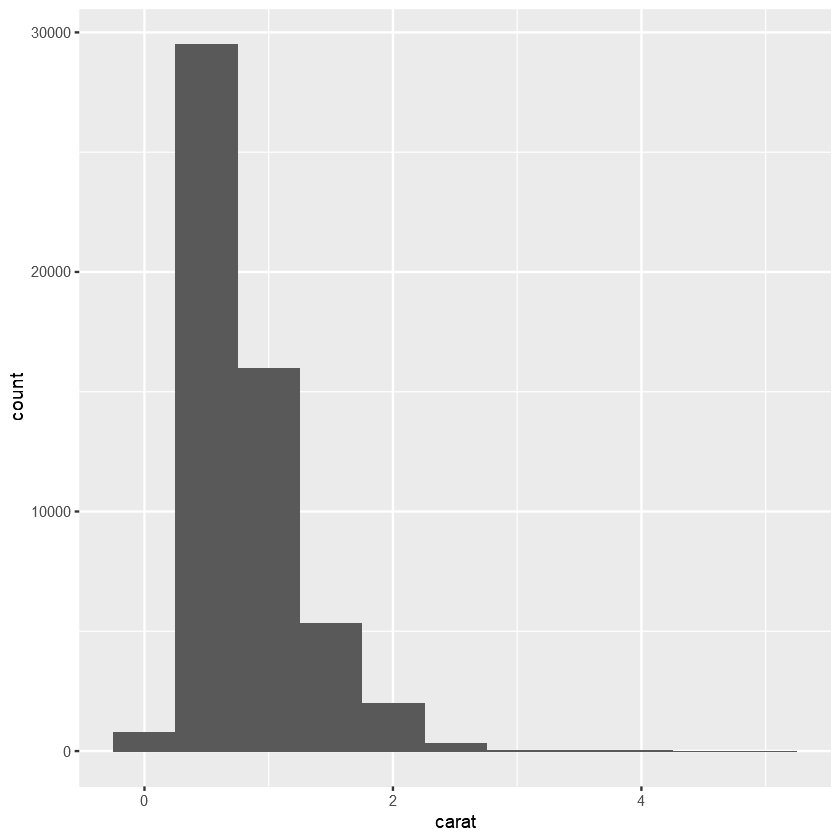

In [14]:
# 연속형 변수 빈도
ggplot(diamonds) + geom_histogram(aes(x = carat), binwidth = 0.5)

In [13]:
diamonds %>% count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


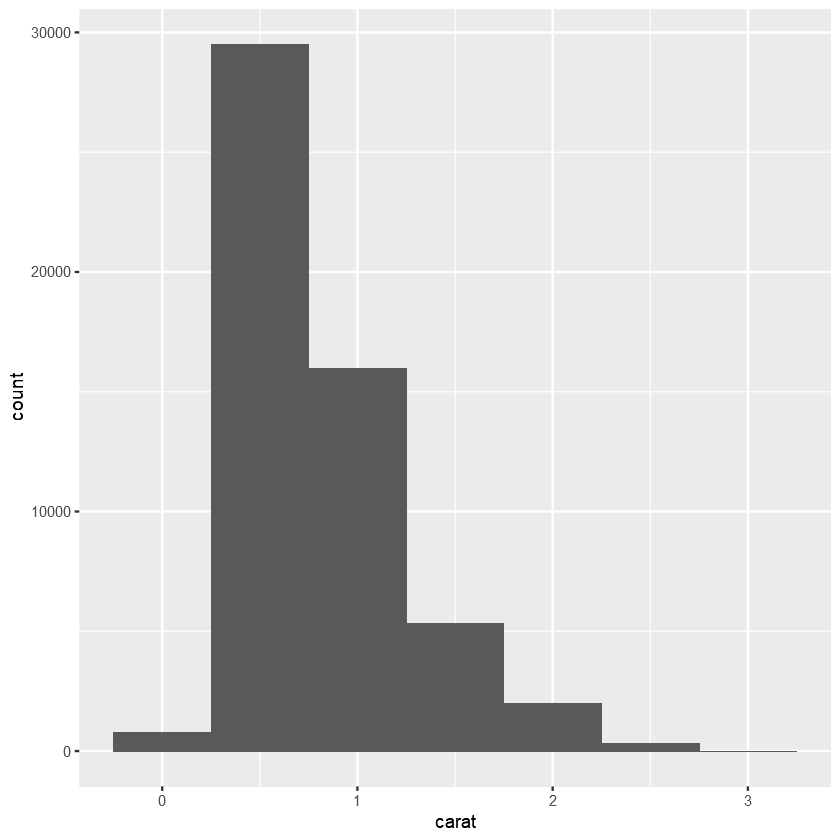

In [19]:
# 3캐럿 이하 
smaller <- diamonds %>% filter(carat < 3) 
ggplot(smaller) + geom_histogram(aes(x = carat), binwidth = 0.5)

In [18]:
smaller %>% count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",3


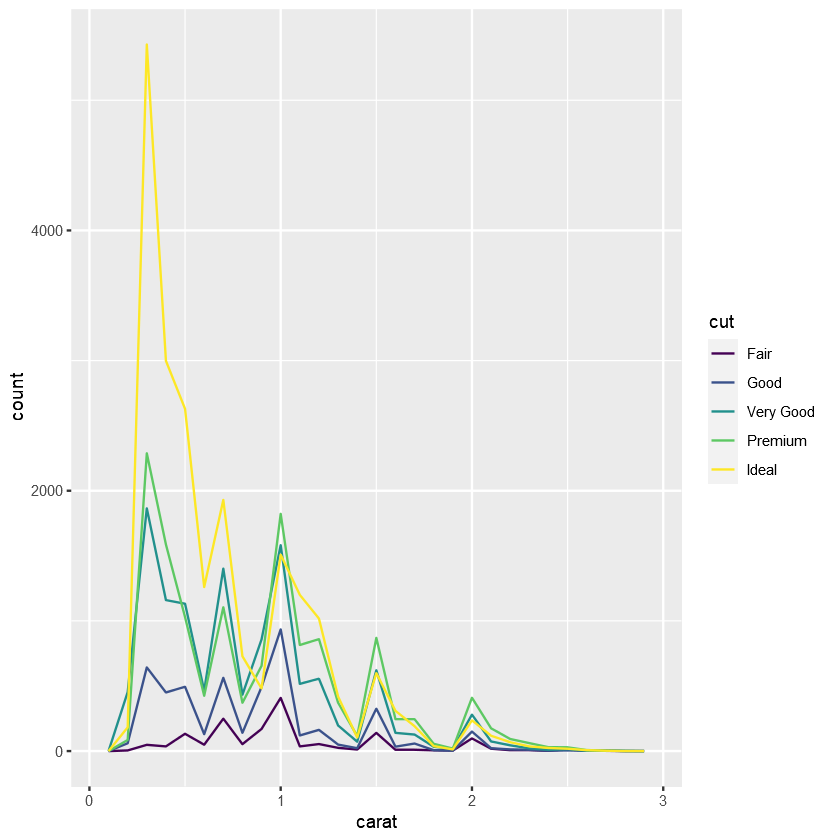

In [24]:
ggplot(smaller) + geom_freqpoly(aes(x = carat, color = cut), binwidth = 0.1)

### 일반적인 값 

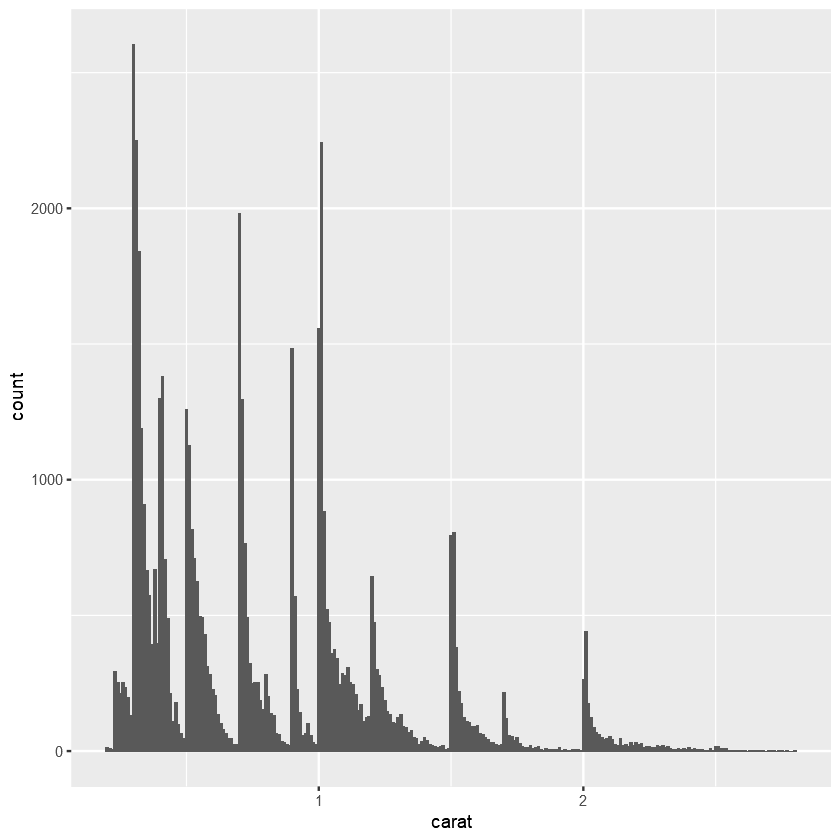

In [26]:
ggplot(smaller, aes(x = carat)) + geom_histogram(binwidth = 0.01)

In [27]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


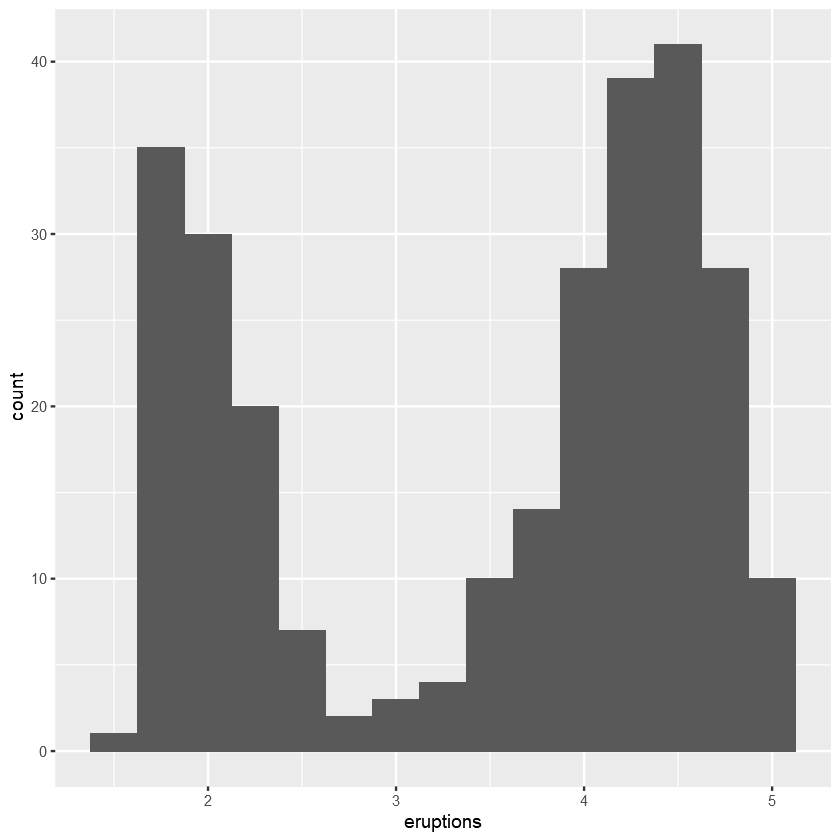

In [28]:
ggplot(faithful, aes(x = eruptions)) + geom_histogram(binwidth = 0.25)

### 이상값

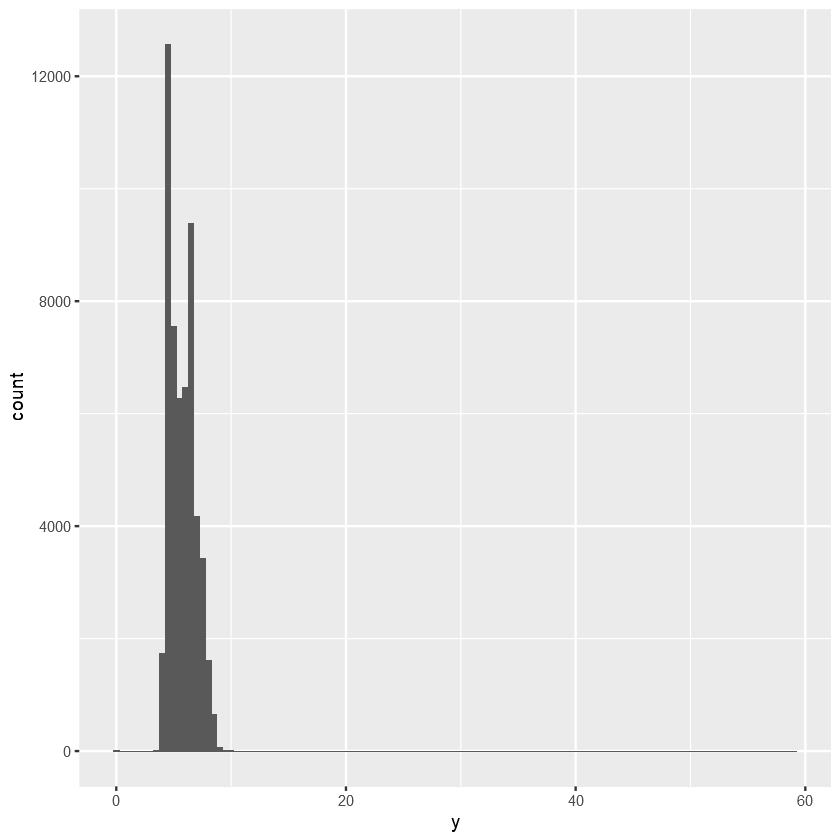

In [30]:
ggplot(diamonds) + geom_histogram(mapping = aes(x = y), binwidth = 0.5)

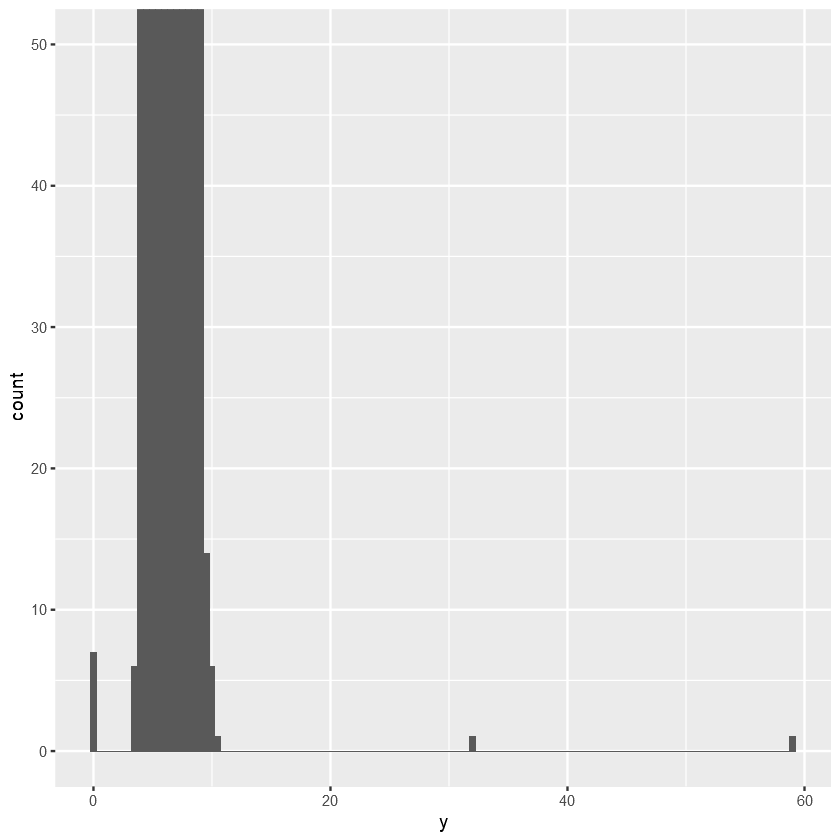

In [32]:
ggplot(diamonds) + geom_histogram(aes(x = y), binwidth = 0.5) + 
coord_cartesian(ylim = c(0, 50)) # Y축의 범위를 축소

In [62]:
IQR <- IQR(diamonds$y) # IQR
LCL <- fivenum(diamonds$y)[2] - 1.5*IQR
UCL <- fivenum(diamonds$y)[4] + 1.5*IQR
IQR; UCL ; LCL ; fivenum(diamonds$y)

[1] 1.82

[1] 9.27

[1] 1.99

[1]  0.00  4.72  5.71  6.54 58.90

In [64]:
# IQR기준 이상치
unusual <- diamonds %>% filter(y < LCL | y > UCL) %>% 
select(price, x, y, z) %>% arrange(y)
head(unusual)

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0,0,0
6381,0,0,0
12800,0,0,0
15686,0,0,0
18034,0,0,0
2130,0,0,0


In [ ]:
# 5.3.4
# 1 
ggplot(diamonds) + geom_histogram(aes(x = x))
ggplot(diamonds) + geom_histogram(aes(x = y))
ggplot(diamonds) + geom_histogram(aes(x = z))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



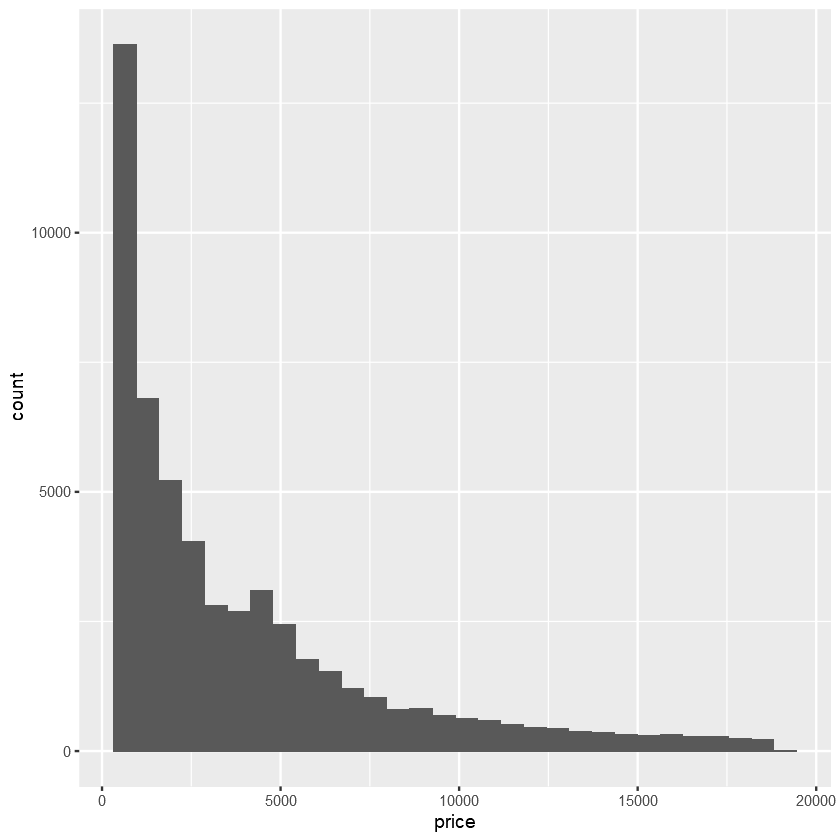

In [67]:
# 2
ggplot(diamonds) + geom_histogram(aes(x = price))

In [76]:
# 3 
diamonds %>% filter(carat == 0.99) %>% summarize(count = n())
diamonds %>% filter(carat == 1) %>% summarize(count = n())

count
<int>
23


count
<int>
1558


### 결측값

In [78]:
diamonds2 <- diamonds %>% filter(between(y, LCL, UCL)) # 이상치 제외 

In [79]:
diamonds3 <- diamonds %>% mutate(y = ifelse(y < LCL | y > UCL, NA, y)) 
# 이상치를 결측값으로 대체

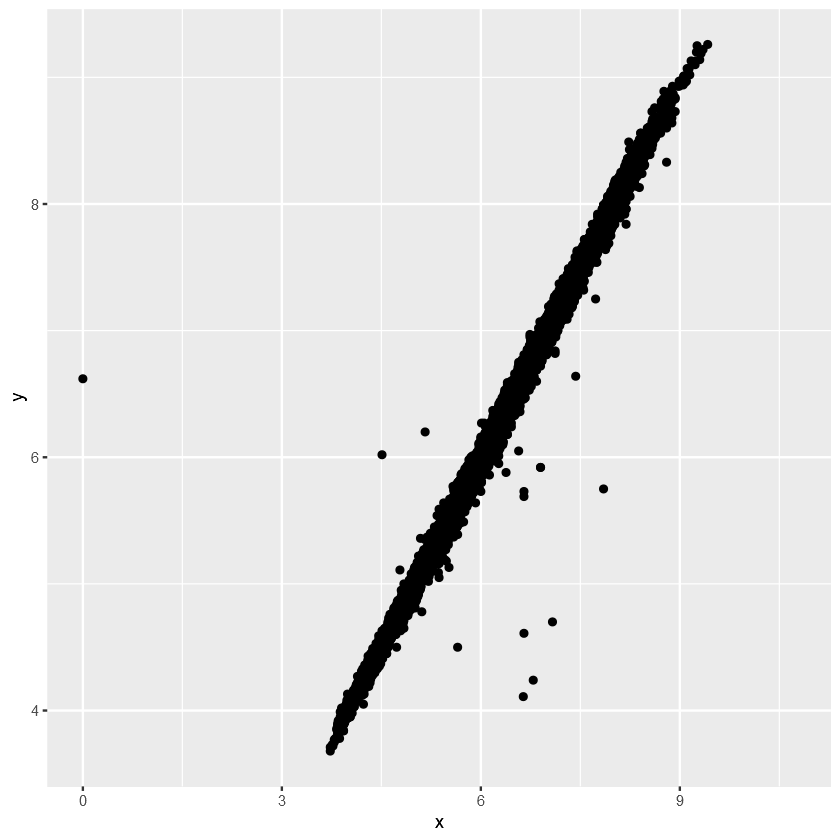

In [83]:
ggplot(diamonds3) + geom_point(aes(x = x, y = y), na.rm = T)

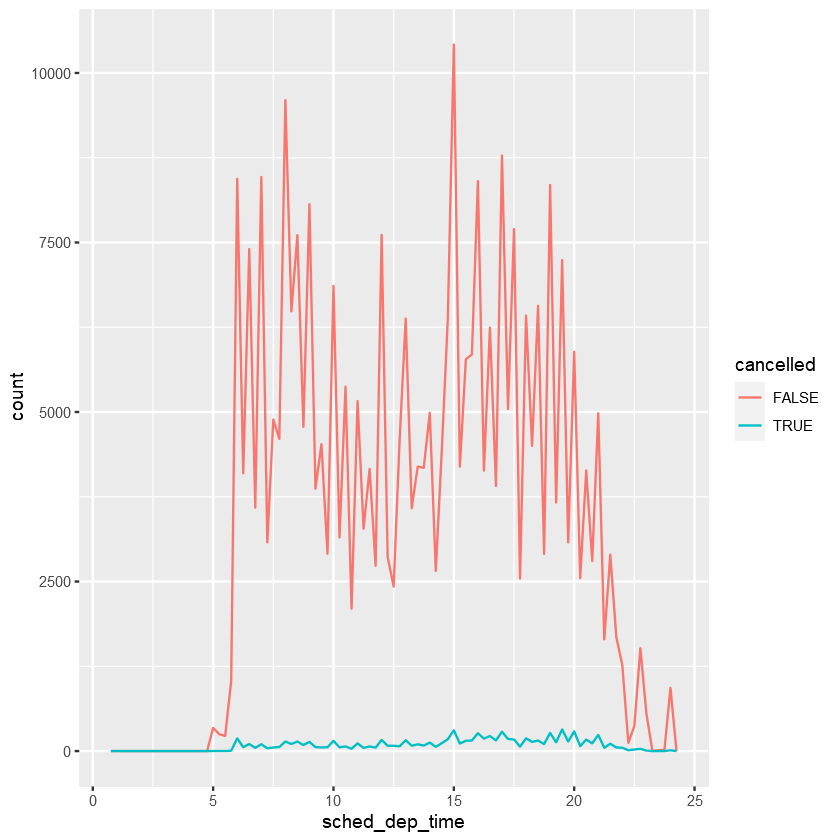

In [84]:
nycflights13::flights %>% mutate(cancelled = is.na(dep_time),
                                sched_hour = sched_dep_time %/% 100,
                                sched_min = sched_dep_time %% 100,
                                sched_dep_time = sched_hour + sched_min / 60) %>%
ggplot(aes(sched_dep_time)) + geom_freqpoly(aes(color = cancelled),
                                           binwidth = 0.25)

### 공분산

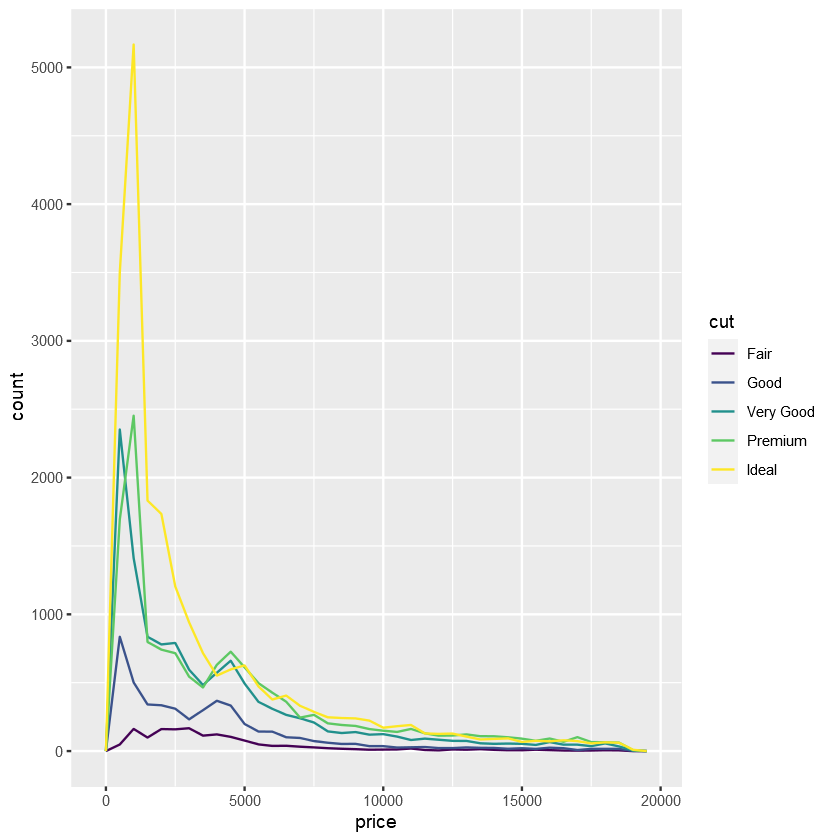

In [85]:
ggplot(diamonds, aes(x = price)) + geom_freqpoly(aes(color = cut), binwidth = 500)

### 밀도

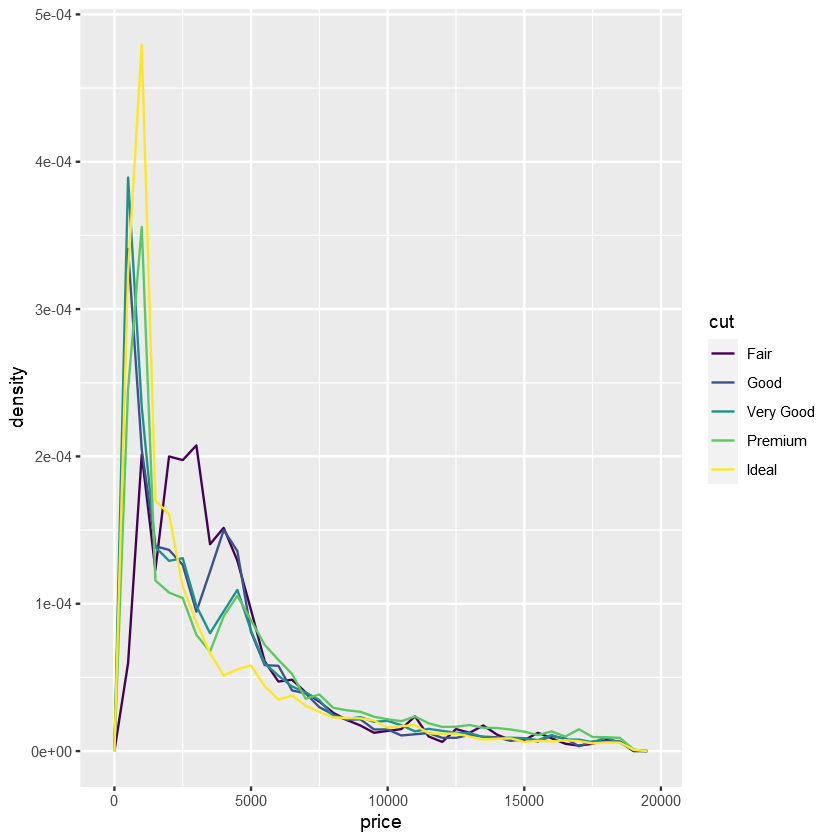

In [86]:
ggplot(diamonds, aes(x = price, y = ..density..)) + 
geom_freqpoly(aes(color = cut), binwidth = 500)

### boxplot

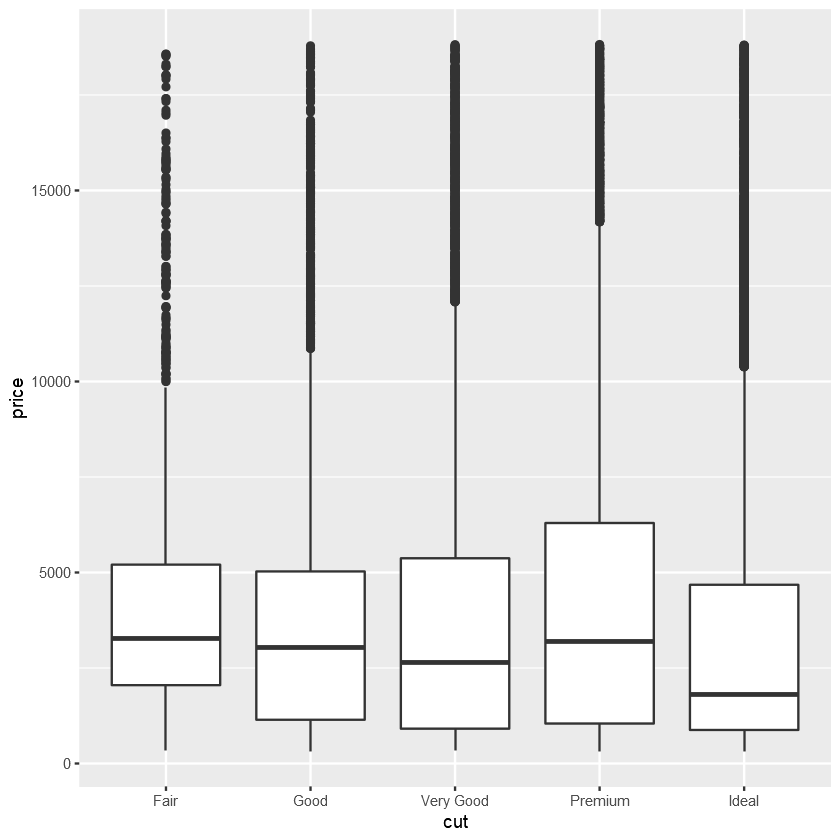

In [88]:
ggplot(diamonds) + geom_boxplot(aes(x = cut, y = price))
# cut별 price의 boxplot

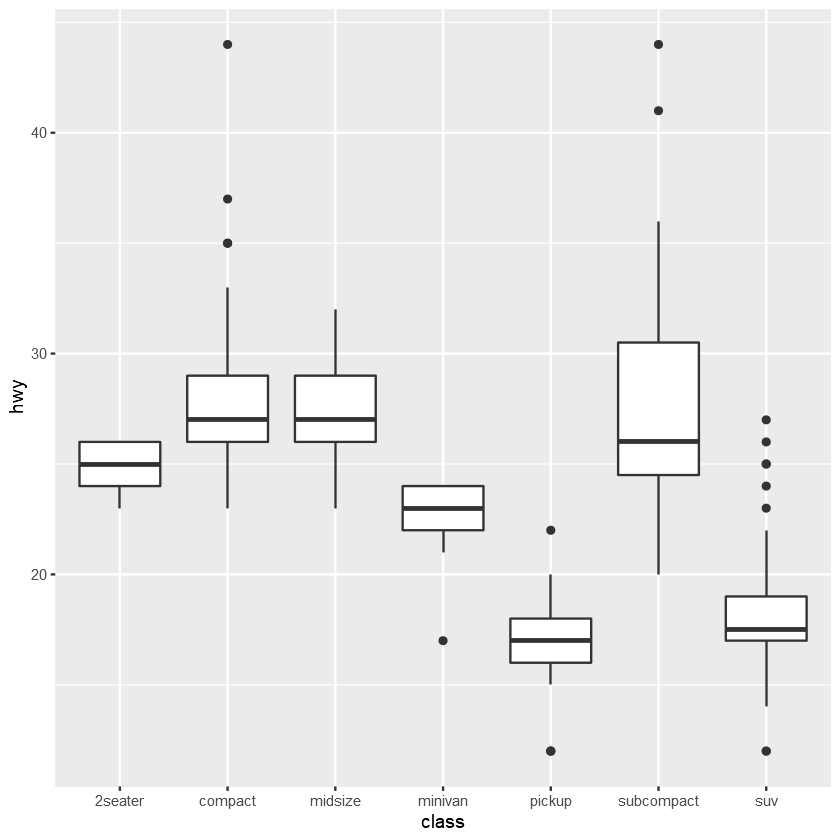

In [91]:
ggplot(mpg) + geom_boxplot(aes(x = class, y = hwy)) # class별 hwy의 boxplot

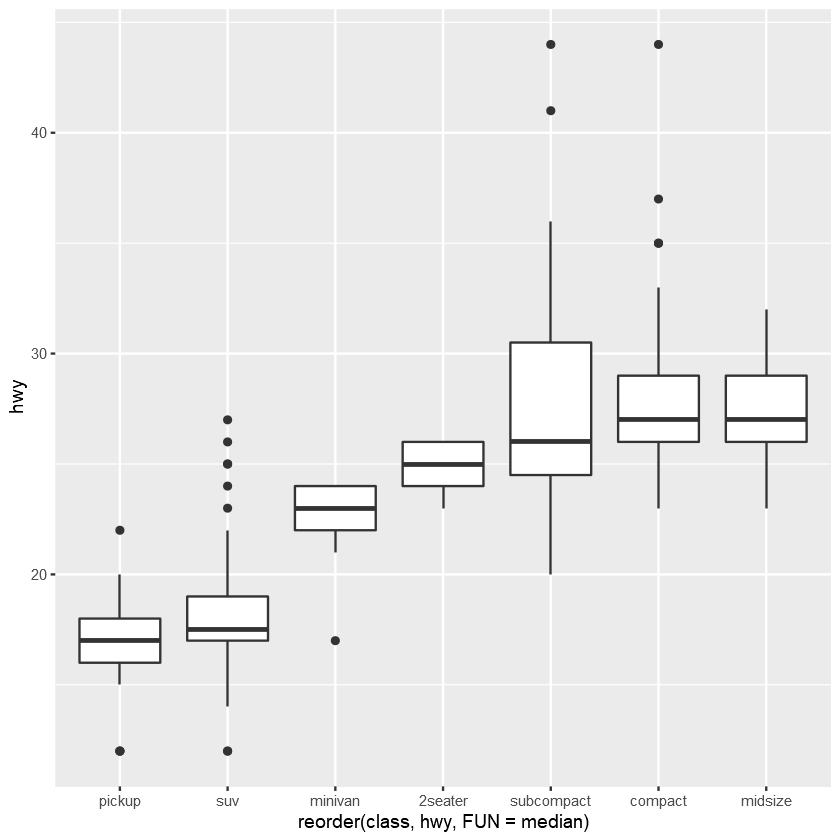

In [94]:
ggplot(mpg) + 
geom_boxplot(aes(x = reorder(class, hwy, FUN = median),
                y = hwy))
# hwy변수의 중간값을 기준으로 class변수의 순서 변경

### coord_flip() : 가로 세로 축 전환

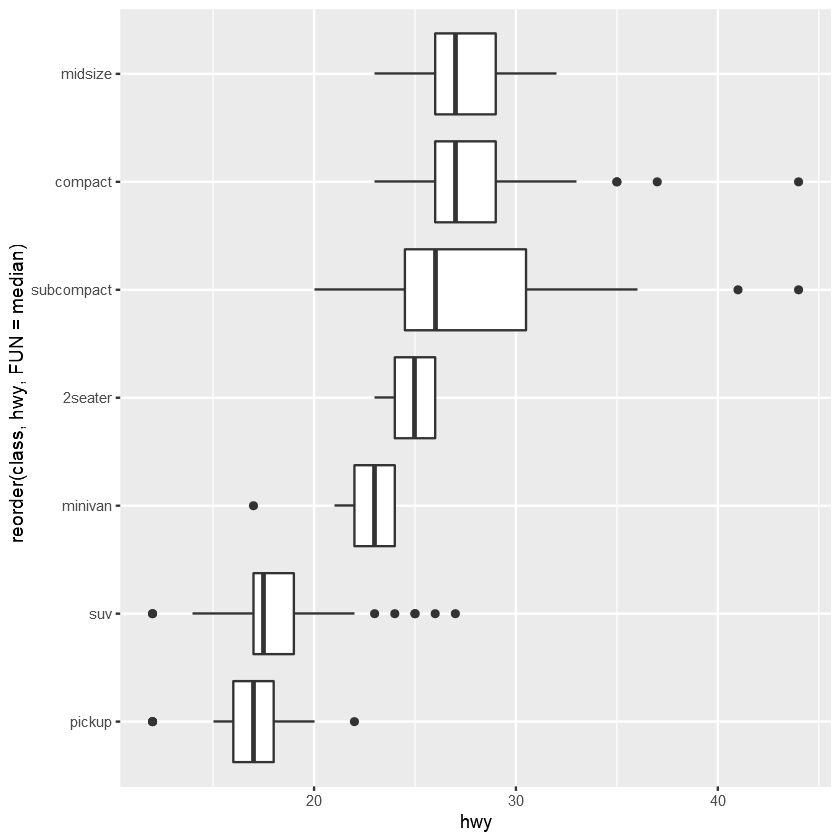

In [97]:
ggplot(mpg) + 
geom_boxplot(aes(x = reorder(class, hwy, FUN = median),
                y = hwy)) + 
coord_flip() # 가로 세로 축 전환

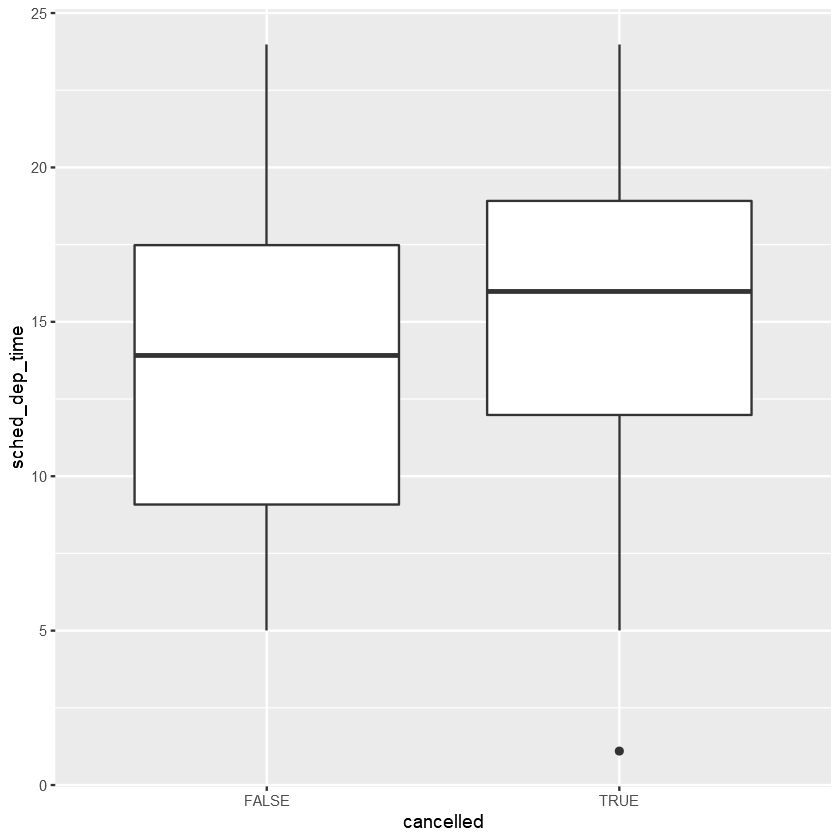

In [105]:
# 5.5.2
# 1 
nycflights13::flights %>%
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>%
  ggplot() +
  geom_boxplot(mapping = aes(y = sched_dep_time, x = cancelled))

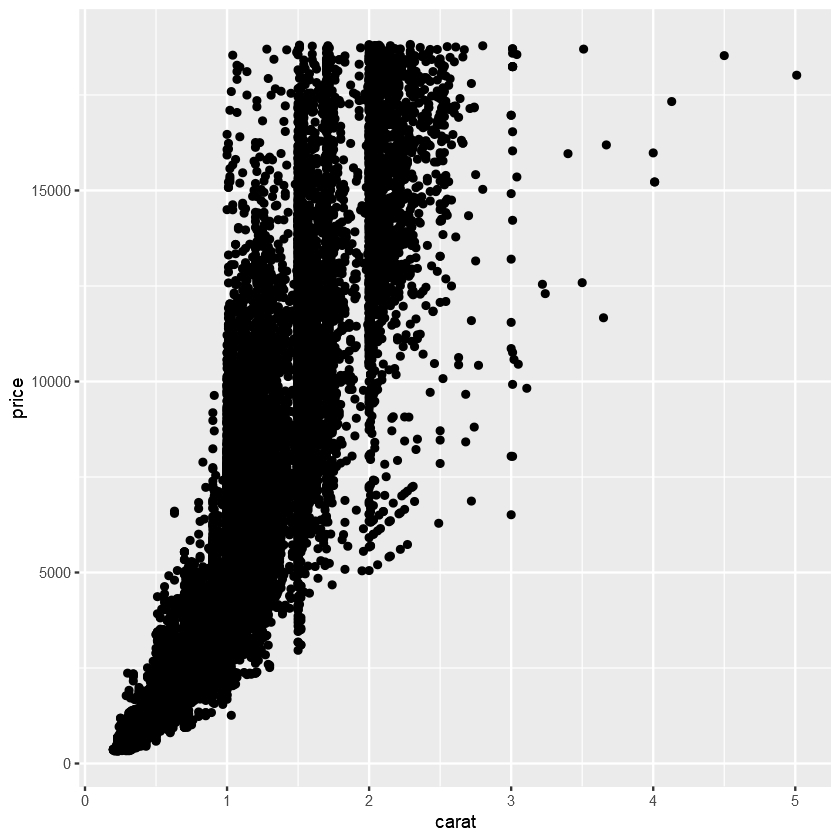

In [106]:
# 2
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point()

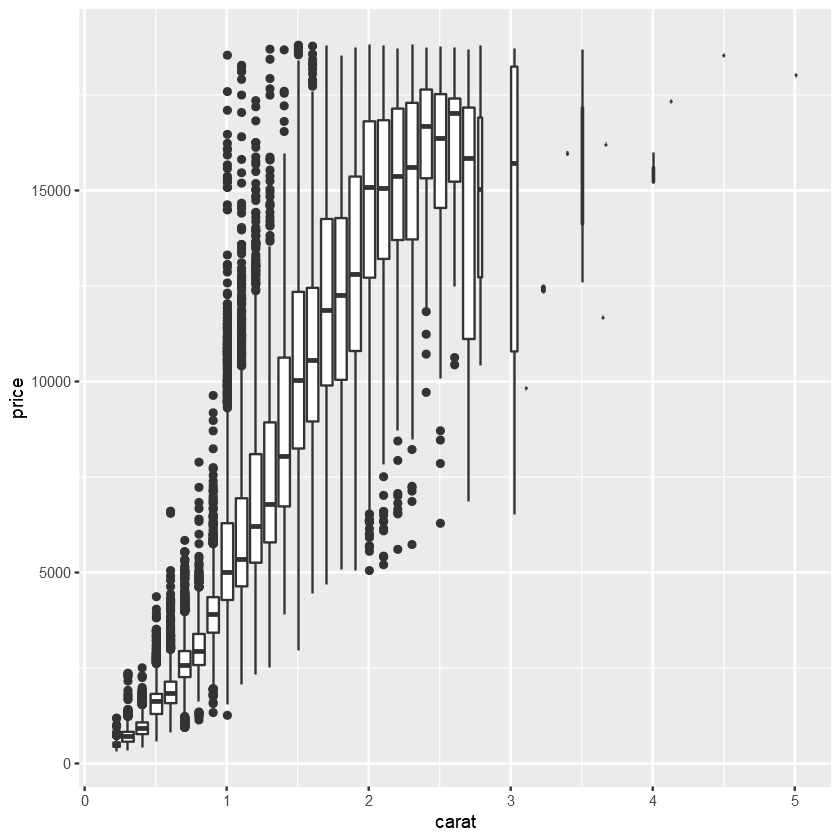

In [107]:
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_boxplot(aes(group = cut_width(carat, 0.1)), orientation = "x")

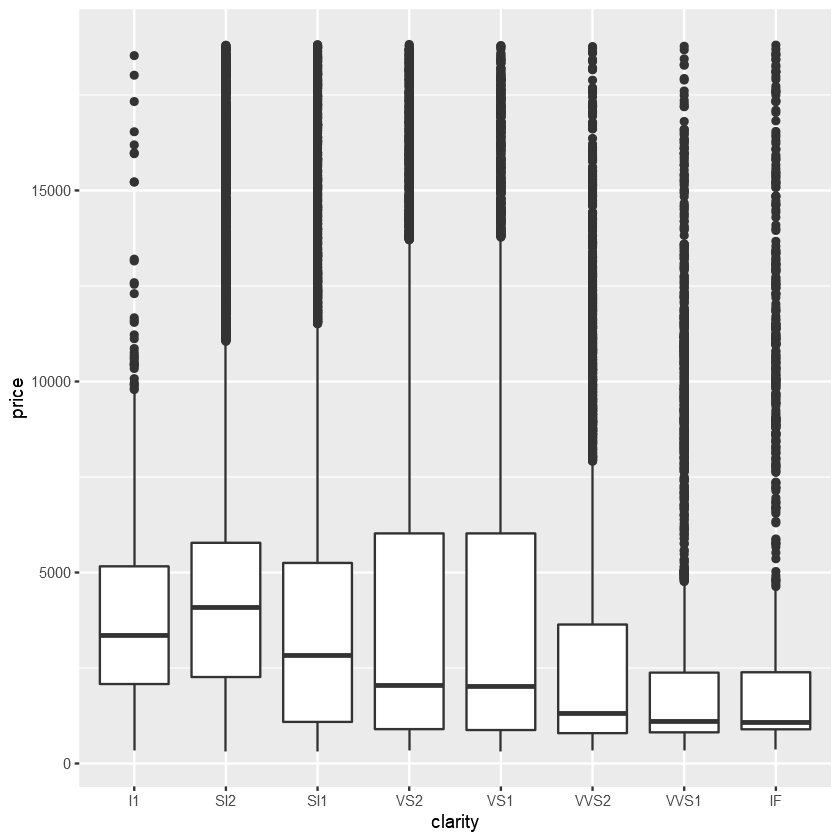

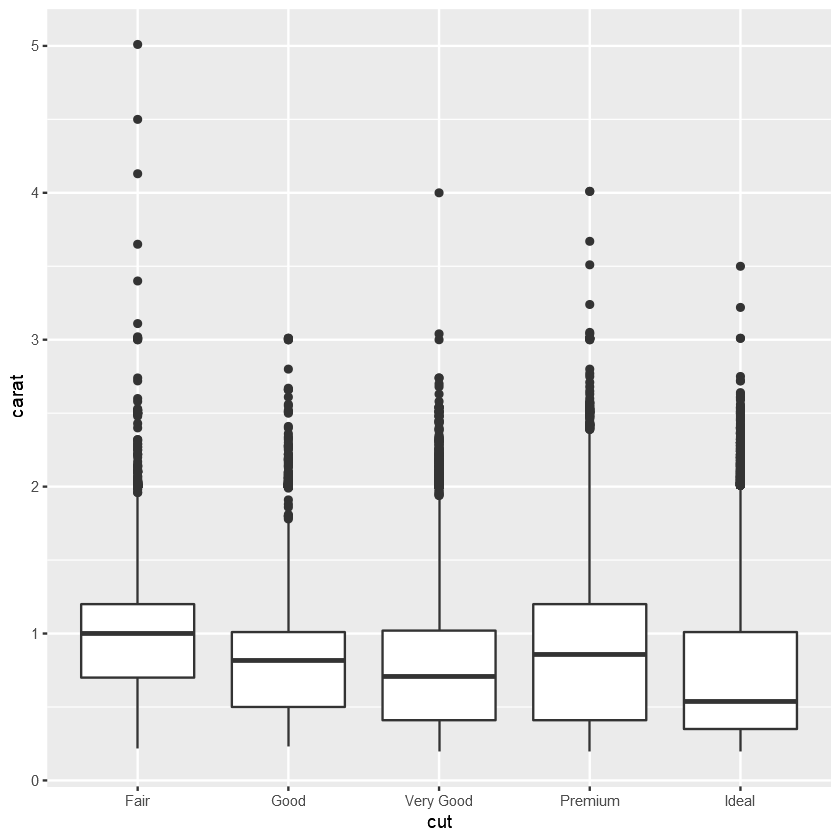

In [108]:
ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(x = clarity, y = price))
ggplot(diamonds, aes(x = cut, y = carat)) +
  geom_boxplot()

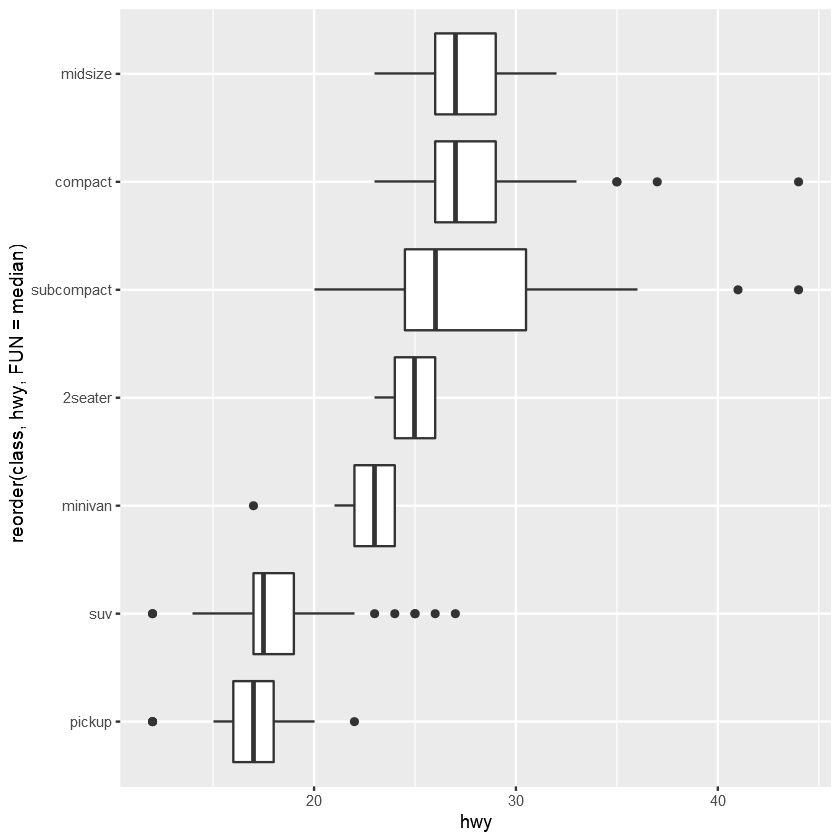

In [110]:
# 3
library(ggstance)
ggplot(data = mpg) +
  geom_boxploth(mapping = aes(y = reorder(class, hwy, FUN = median), x = hwy))

### violin

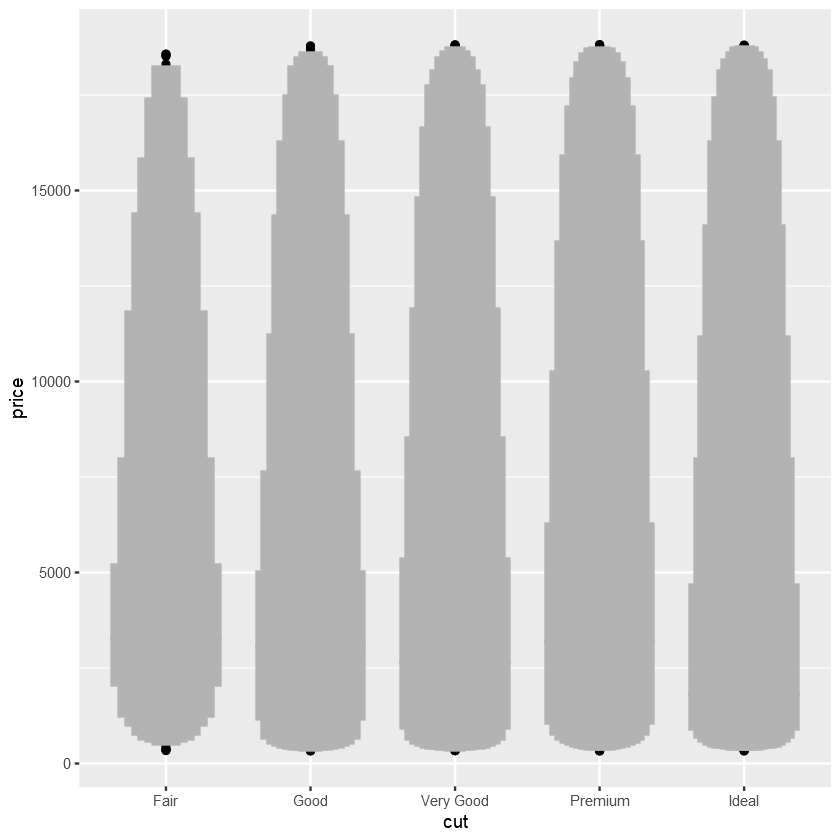

In [111]:
# 4
library(lvplot)
ggplot(diamonds, aes(x = cut, y = price)) +
  geom_lv()

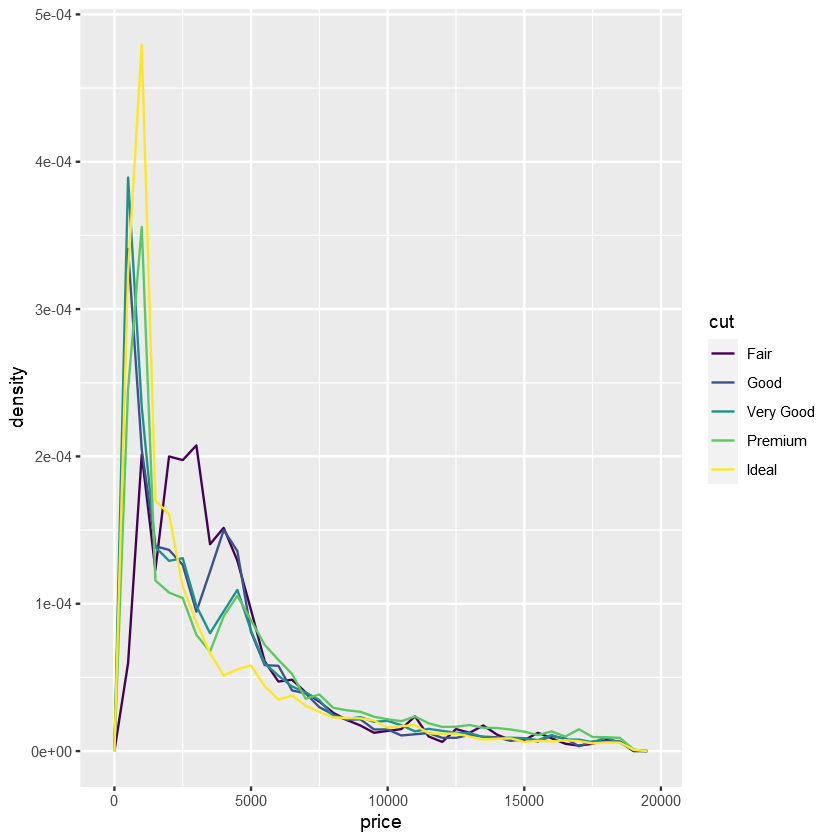

In [112]:
# 5
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) +
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



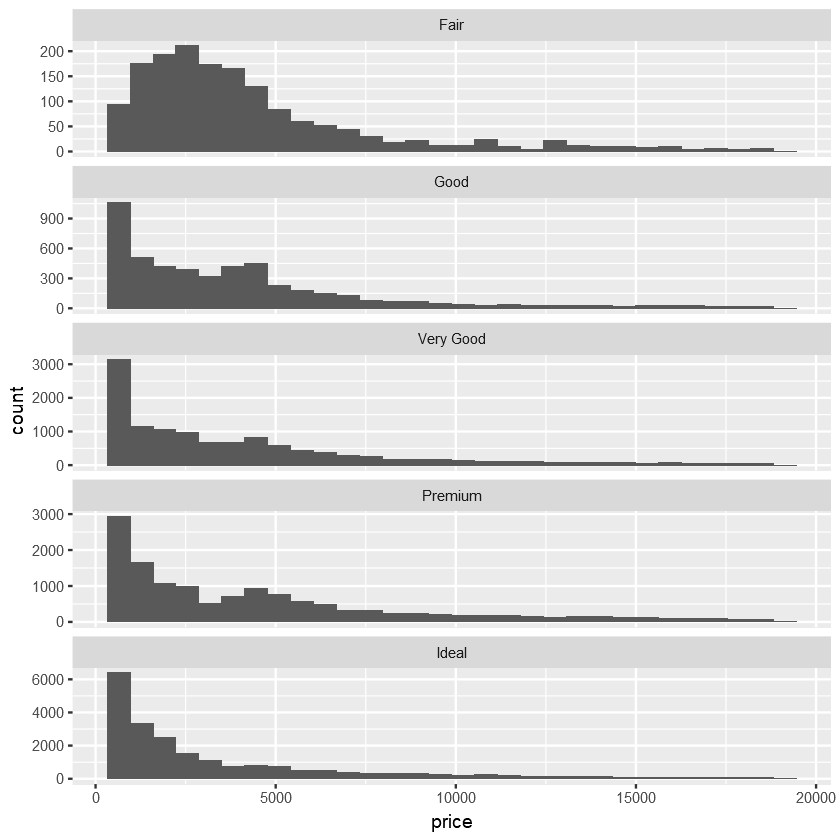

In [117]:
ggplot(data = diamonds, mapping = aes(x = price)) +
  geom_histogram() +
  facet_wrap(~cut, ncol = 1, scales = "free_y")

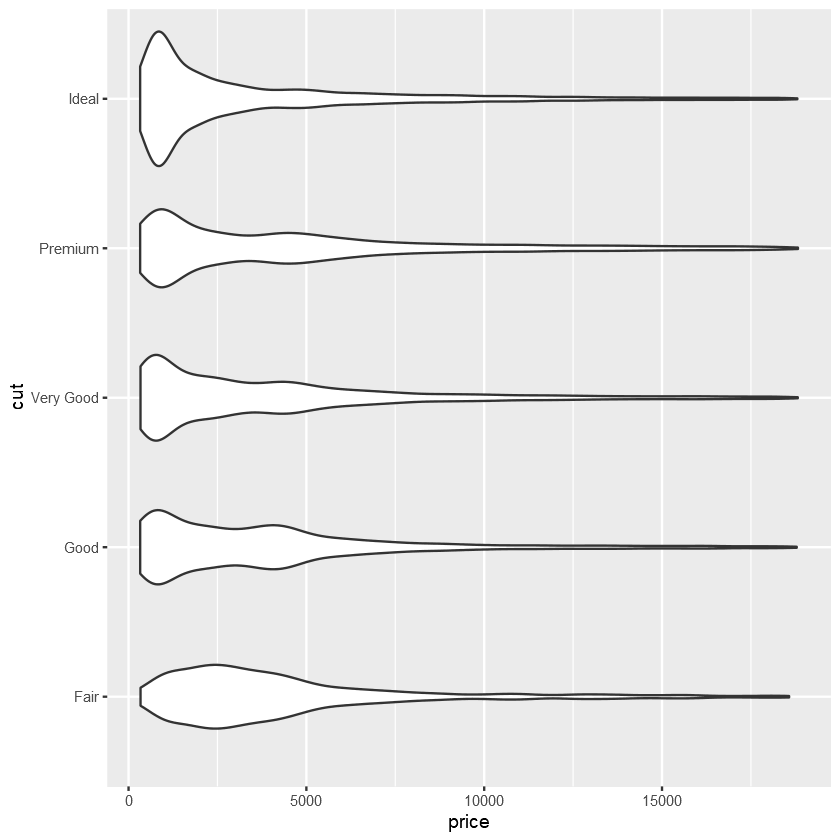

In [114]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_violin() +
  coord_flip()

### quasirandom

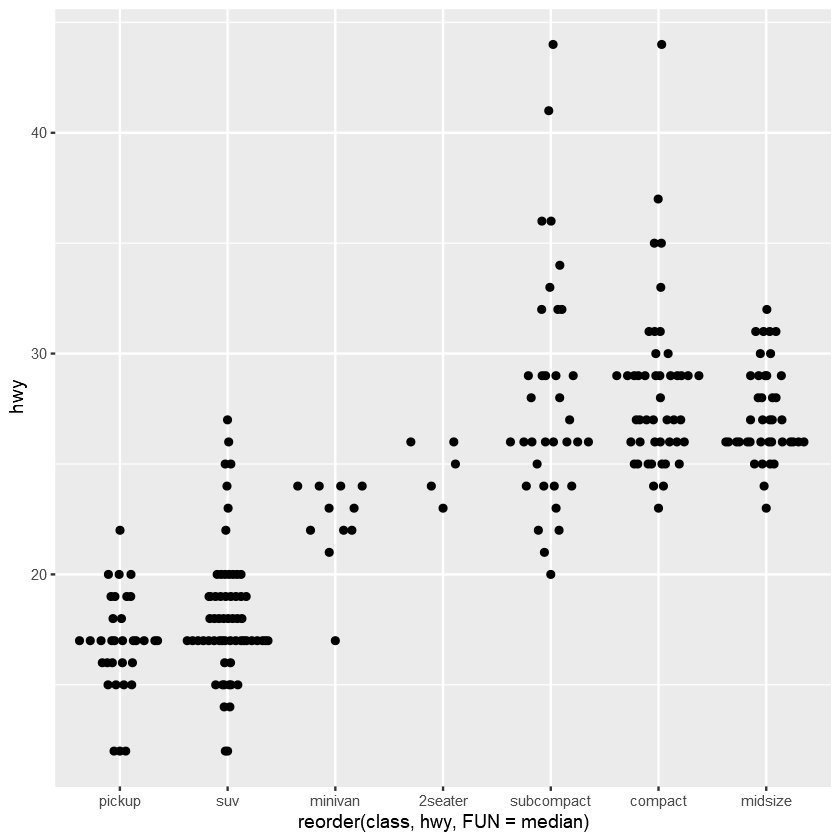

In [119]:
# 6
library(ggbeeswarm)
ggplot(data = mpg) +
  geom_quasirandom(mapping = aes(
    x = reorder(class, hwy, FUN = median),
    y = hwy
  ))

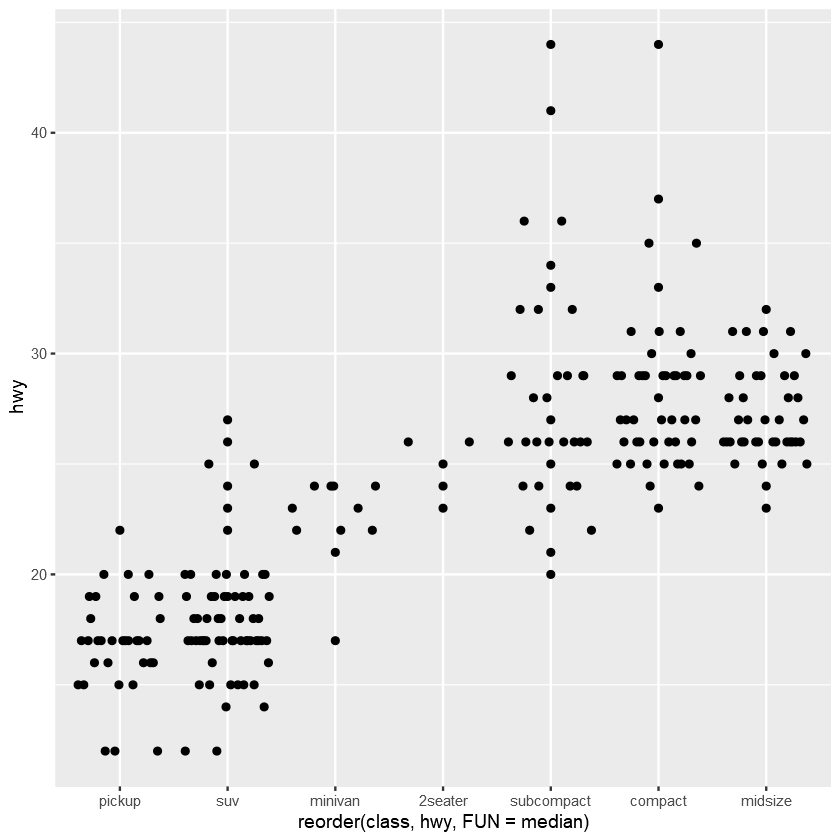

In [120]:
ggplot(data = mpg) +
  geom_quasirandom(
    mapping = aes(
      x = reorder(class, hwy, FUN = median),
      y = hwy
    ),
    method = "tukey" # "tukeyDense", "smiley", "frowney"
  )

### beeswarm

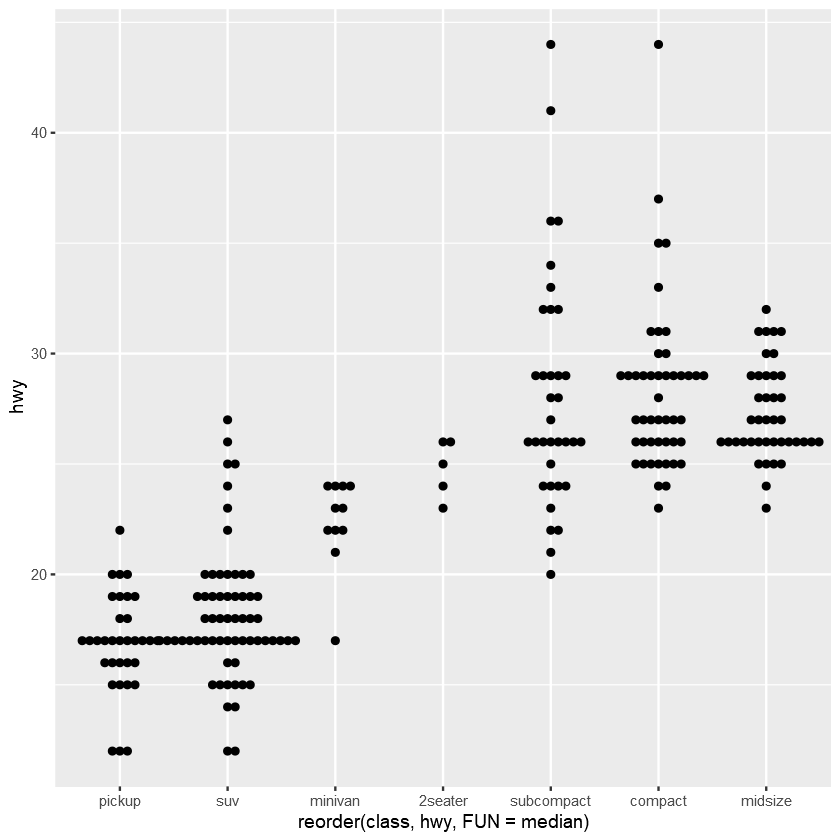

In [124]:
ggplot(data = mpg) +
  geom_beeswarm(mapping = aes(
    x = reorder(class, hwy, FUN = median),
    y = hwy
  ))

### 두 개의 범주형 변수

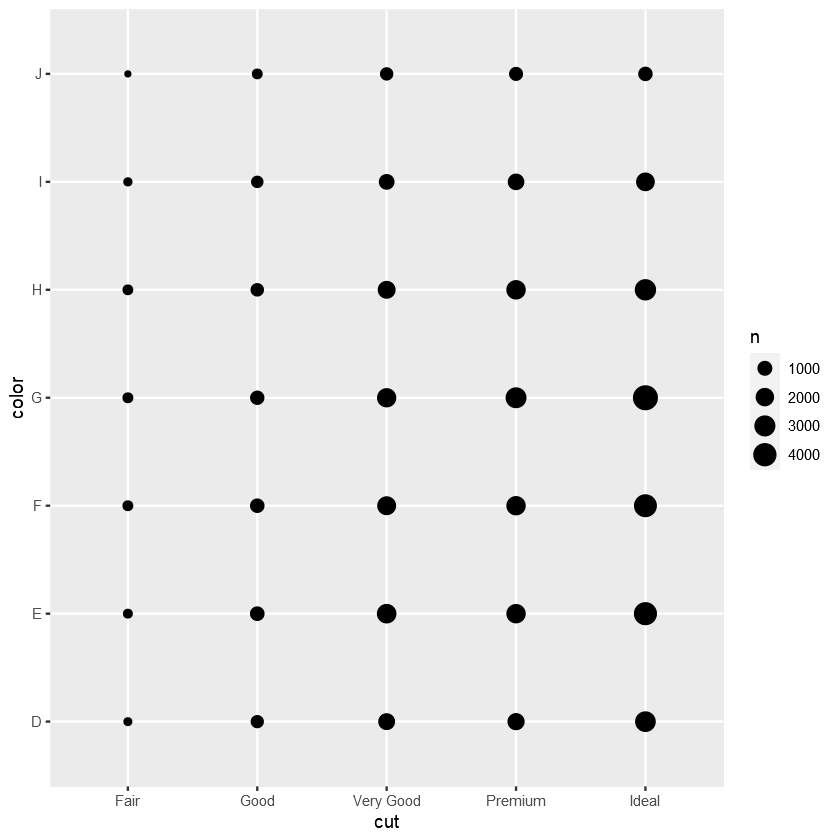

In [125]:
ggplot(diamonds) + geom_count(aes(x = cut, y = color))

### 타일 (히트맵)

In [130]:
diamonds %>% count(color, cut) %>% head()

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224


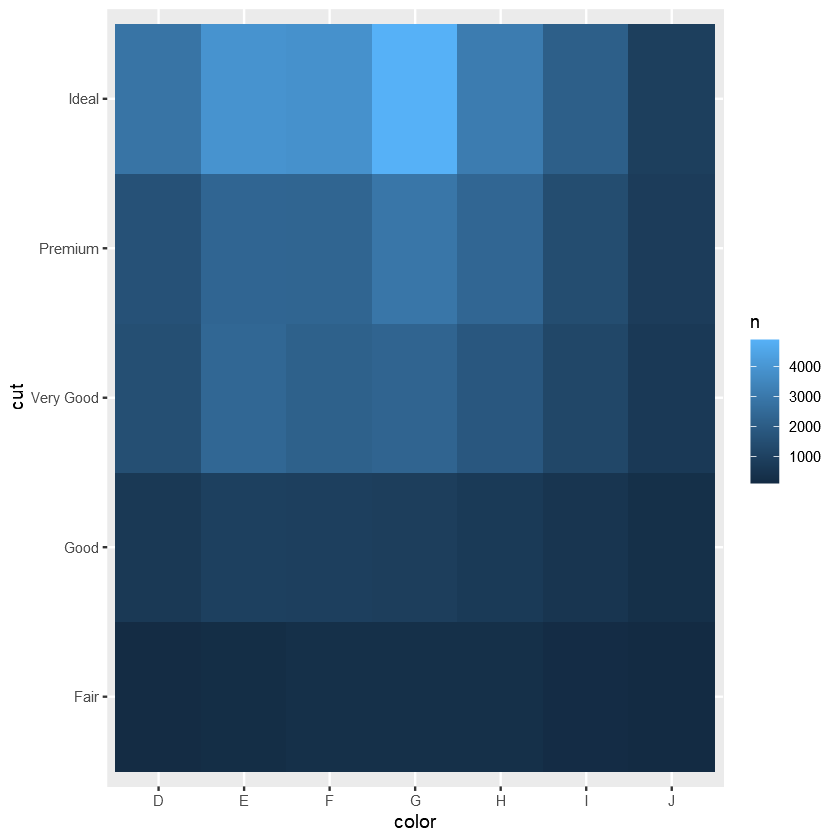

In [131]:
diamonds %>% count(color, cut) %>% 
ggplot(aes(x = color, y = cut)) + 
geom_tile(aes(fill = n)) # n값을 기준으로 색을 채움

In [133]:
# 5.5.4
# 1
diamonds %>%
  count(color, cut) %>%
  group_by(color) %>%
  mutate(prop = n / sum(n)) %>% head()

color,cut,n,prop
<ord>,<ord>,<int>,<dbl>
D,Fair,163,0.02405904
D,Good,662,0.09771218
D,Very Good,1513,0.22332103
D,Premium,1603,0.23660517
D,Ideal,2834,0.41830258
E,Fair,224,0.02286414


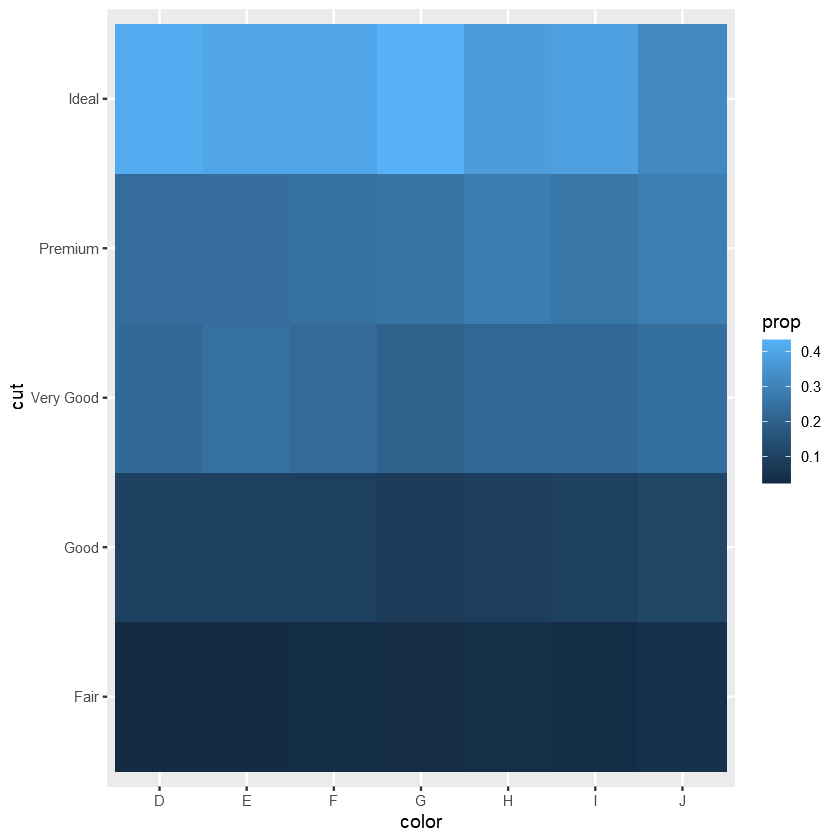

In [134]:
diamonds %>%
  count(color, cut) %>%
  group_by(color) %>%
  mutate(prop = n / sum(n)) %>% 
  ggplot(mapping = aes(x = color, y = cut)) +
  geom_tile(mapping = aes(fill = prop)) # prop을 기준으로 색을 채움

In [135]:
diamonds %>%
  count(color, cut) %>%
  group_by(cut) %>%
  mutate(prop = n / sum(n)) %>% head()

color,cut,n,prop
<ord>,<ord>,<int>,<dbl>
D,Fair,163,0.1012422
D,Good,662,0.1349368
D,Very Good,1513,0.1252276
D,Premium,1603,0.1162352
D,Ideal,2834,0.1315020
E,Fair,224,0.1391304


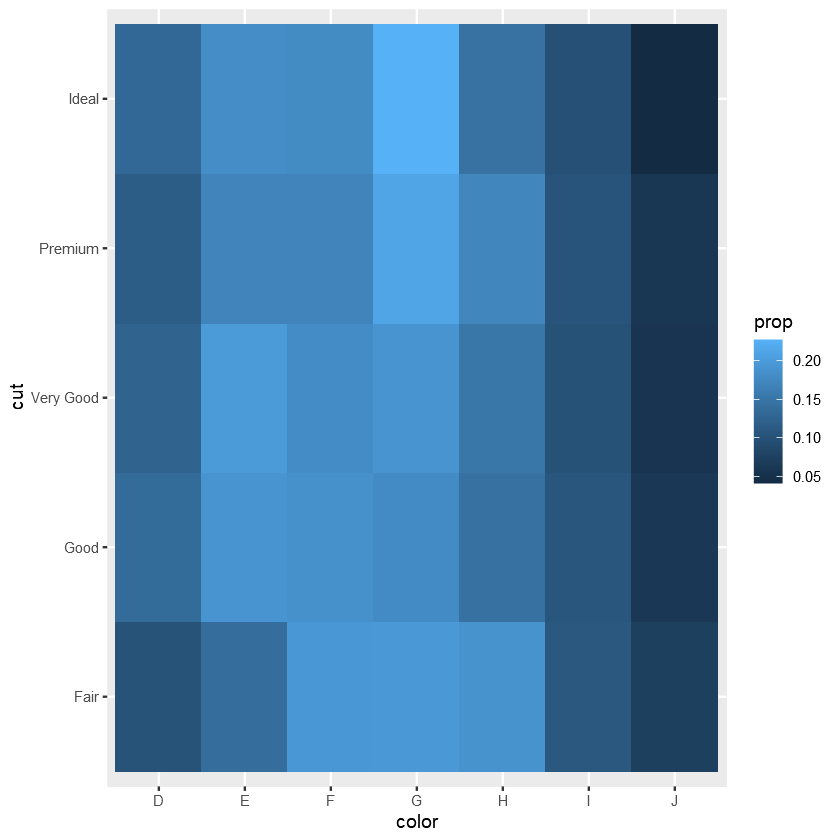

In [136]:
diamonds %>%
  count(color, cut) %>%
  group_by(cut) %>%
  mutate(prop = n / sum(n)) %>%
  ggplot(mapping = aes(x = color, y = cut)) +
  geom_tile(mapping = aes(fill = prop))

### 두 개의 연속형 변수

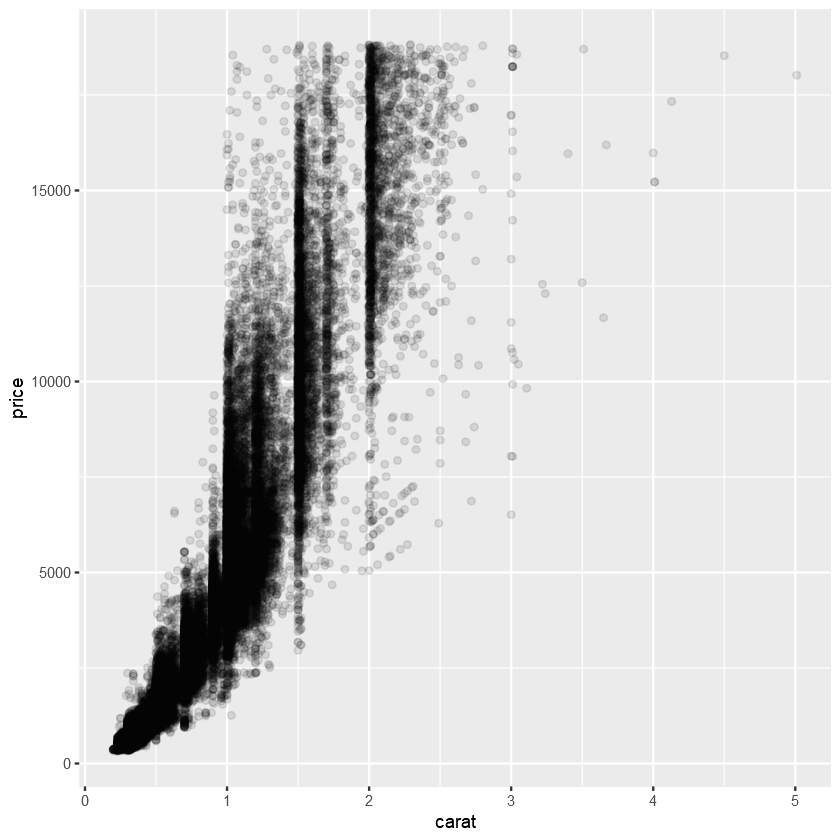

In [141]:
ggplot(diamonds) + geom_point(aes(x = carat, y = price), alpha = 0.1)

### geom_bin2d() 
### geom_hex()
### - 좌표 평면을 2D 빈으로 나눈 후, 각 빈에 몇개의 점에 해당하는지 나타내기 위해 색상 채우기 사용

In [143]:
library(hexbin)

In [144]:
head(smaller)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


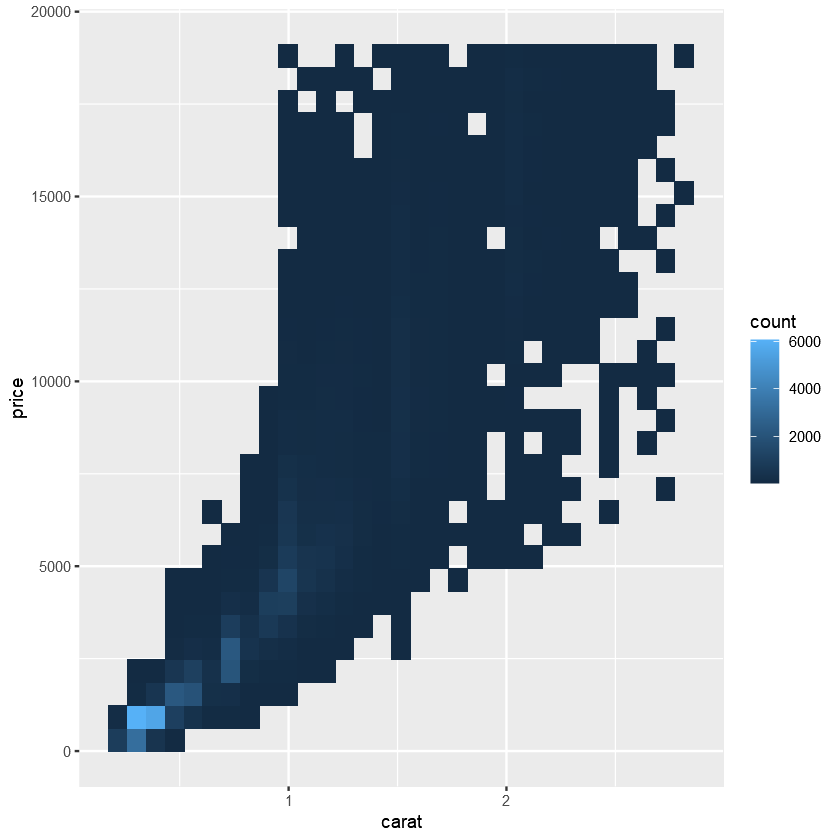

In [146]:
ggplot(smaller) + geom_bin2d(aes(x = carat, y = price))

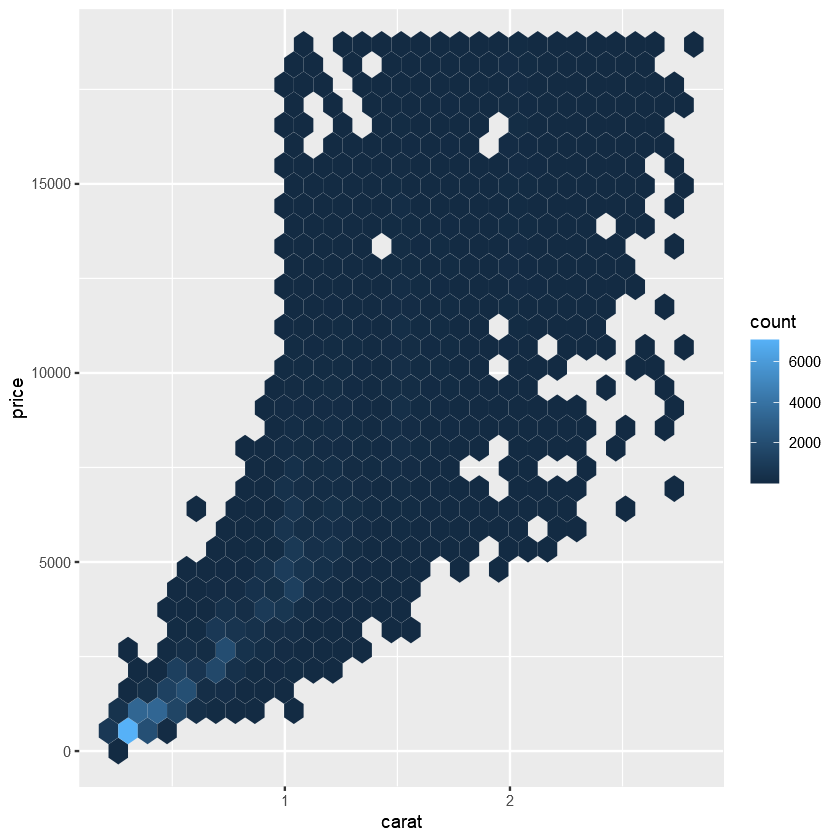

In [147]:
ggplot(smaller) + geom_hex(aes(x = carat, y = price))

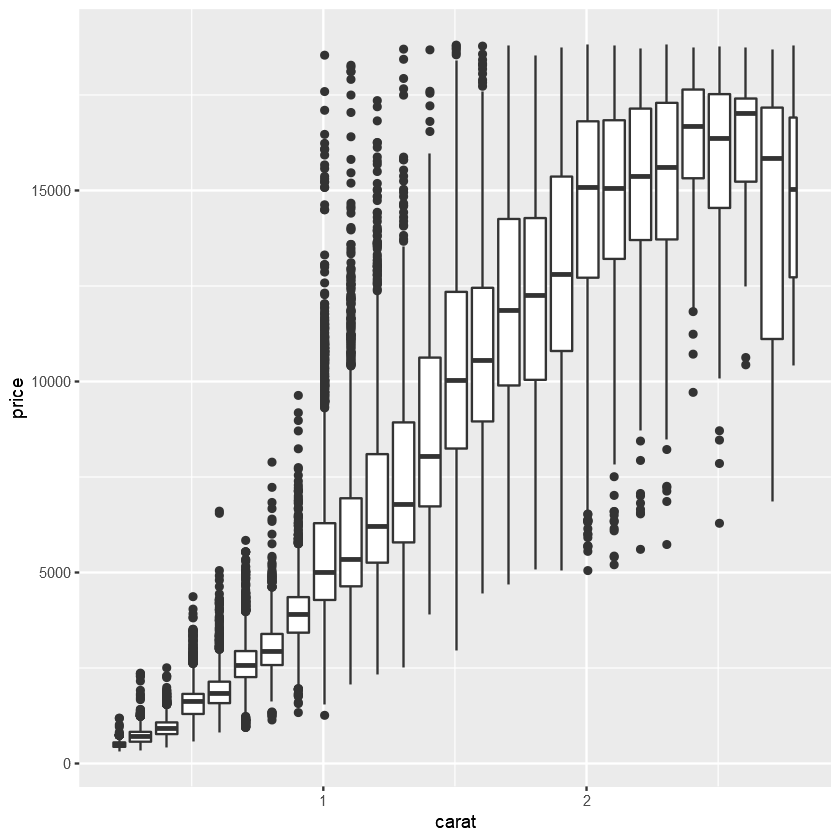

In [148]:
ggplot(smaller, aes(x = carat, y = price)) + 
geom_boxplot(aes(group = cut_width(carat, 0.1))) 
# carat의 0.1단위로 boxplot

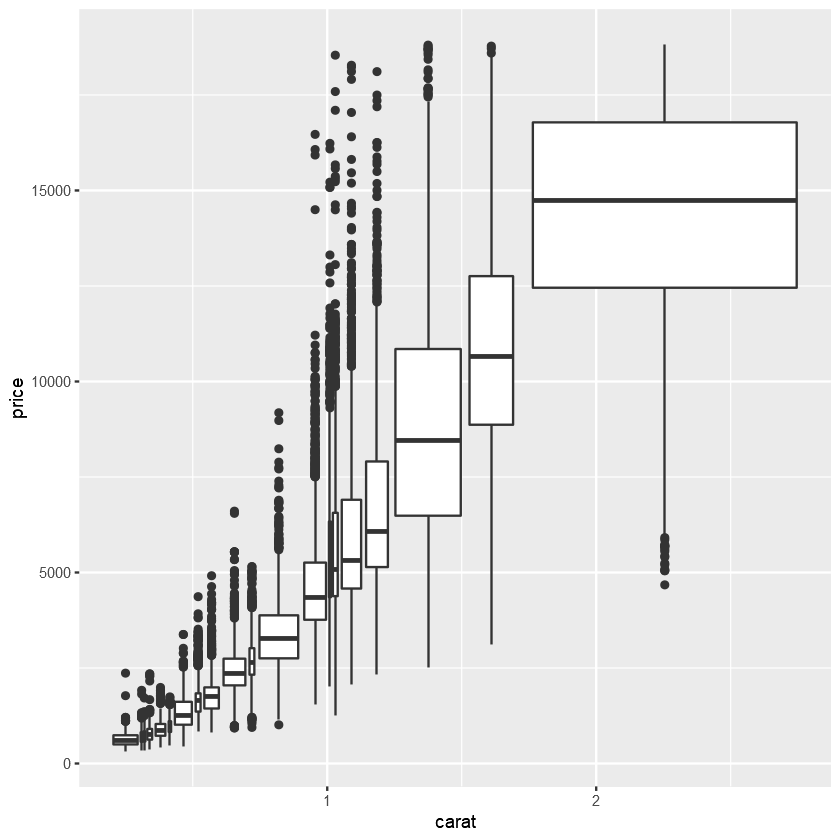

In [149]:
ggplot(smaller, aes(x = carat, y = price)) + 
geom_boxplot(aes(group = cut_number(carat, 20))) 
# 각 구간에 대략적으로 같은 수의 점을 표시 (20개의 구간으로)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



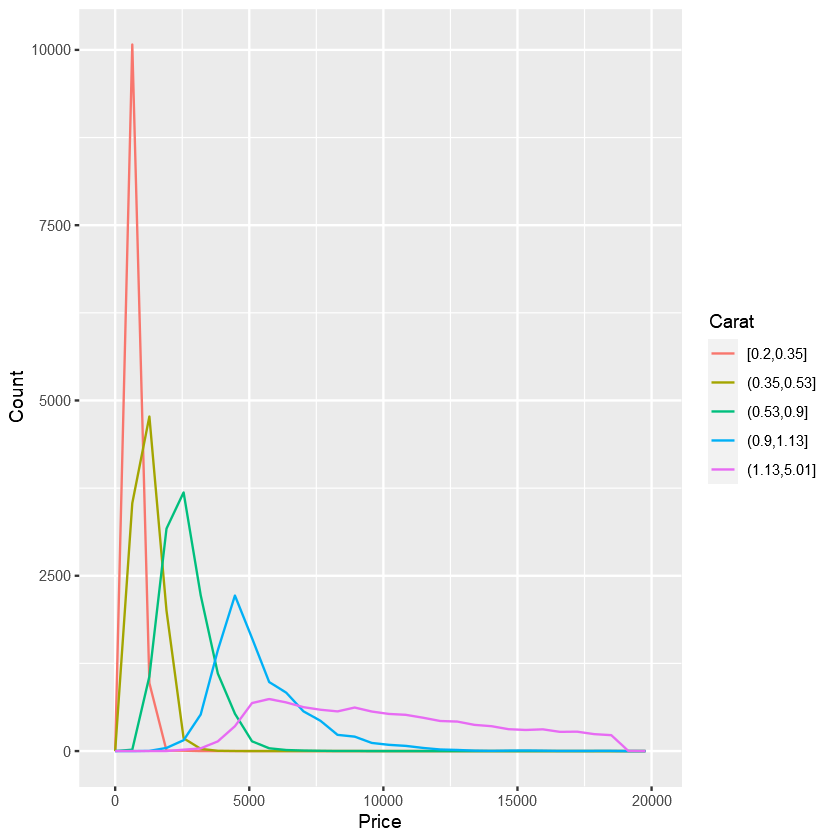

In [150]:
# 5.5.6
# 1 
ggplot(
  data = diamonds,
  mapping = aes(color = cut_number(carat, 5), x = price)
) +
  geom_freqpoly() +
  labs(x = "Price", y = "Count", color = "Carat") # 축의 제목 설정

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



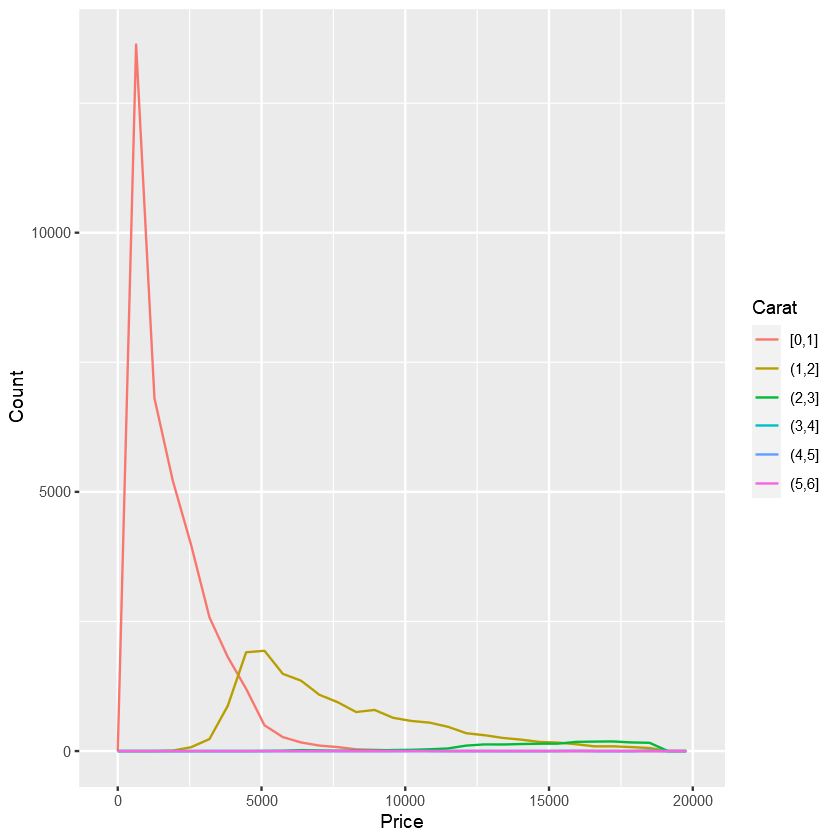

In [151]:
ggplot(
  data = diamonds,
  mapping = aes(color = cut_width(carat, 1, boundary = 0), x = price)
) +
  geom_freqpoly() +
  labs(x = "Price", y = "Count", color = "Carat")

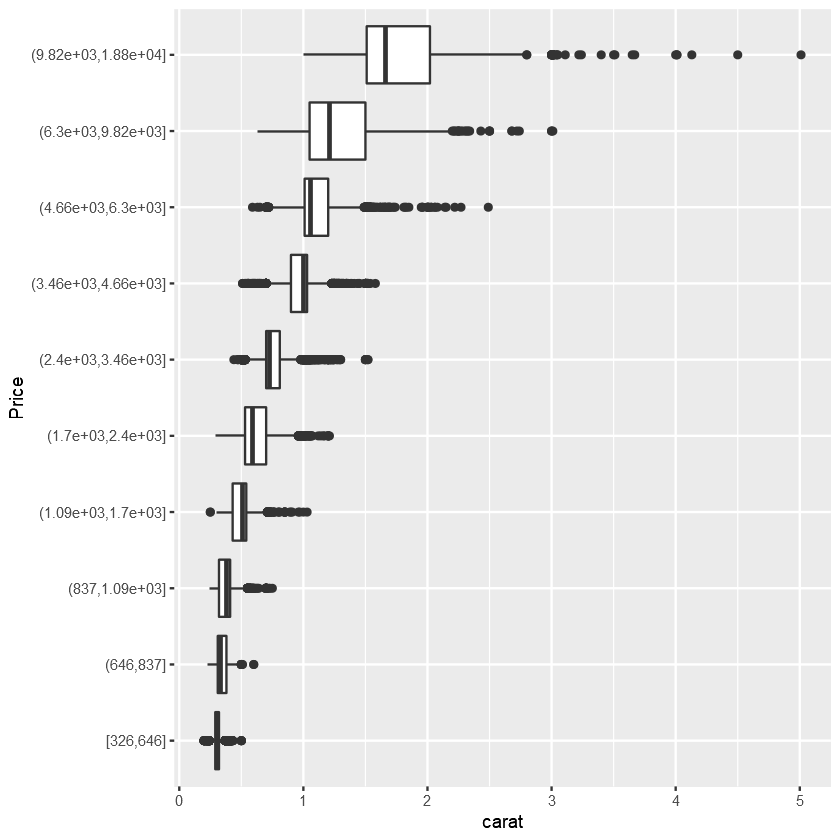

In [157]:
# 2
ggplot(diamonds, aes(x = cut_number(price, 10), y = carat)) +
  geom_boxplot() +
  coord_flip() +
  xlab("Price")

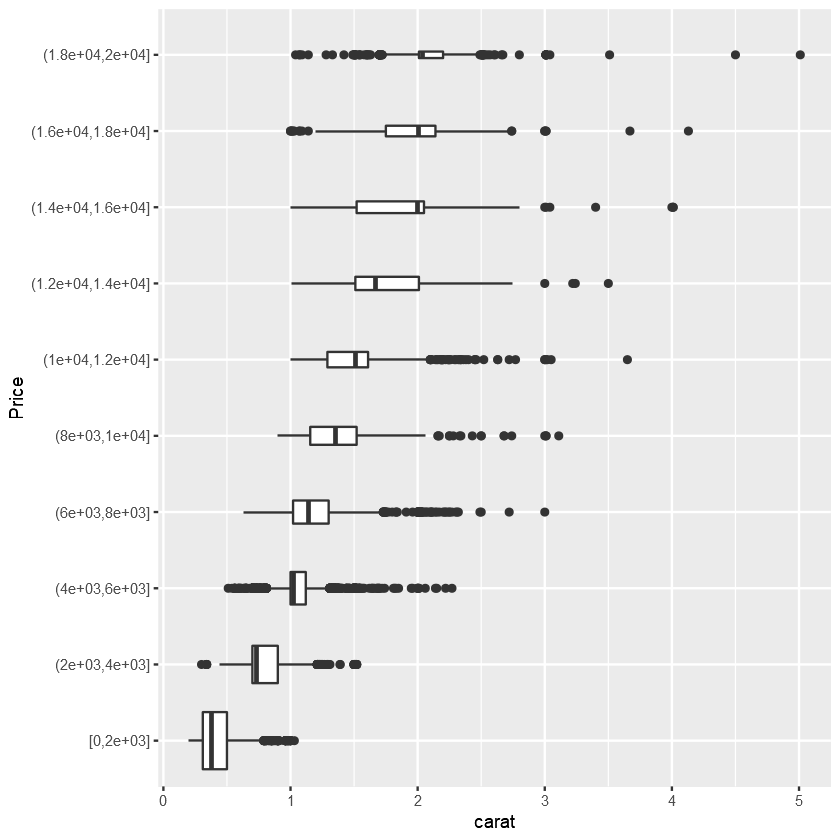

In [154]:
ggplot(diamonds, aes(x = cut_width(price, 2000, boundary = 0), y = carat)) +
  geom_boxplot(varwidth = TRUE) +
  coord_flip() +
  xlab("Price")

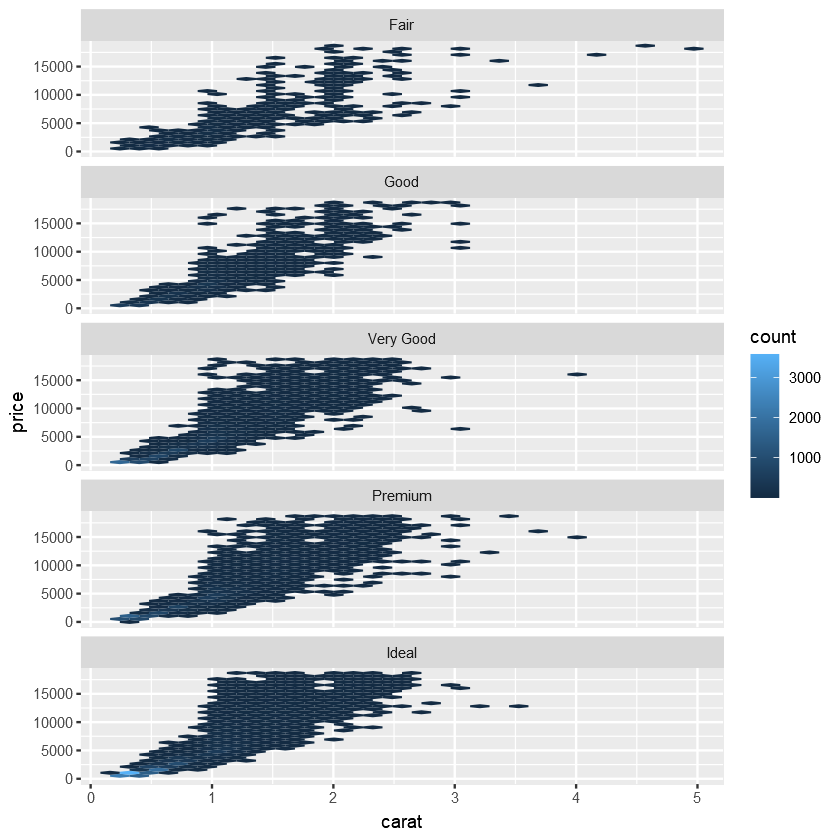

In [155]:
# 4
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_hex() +
  facet_wrap(~cut, ncol = 1)

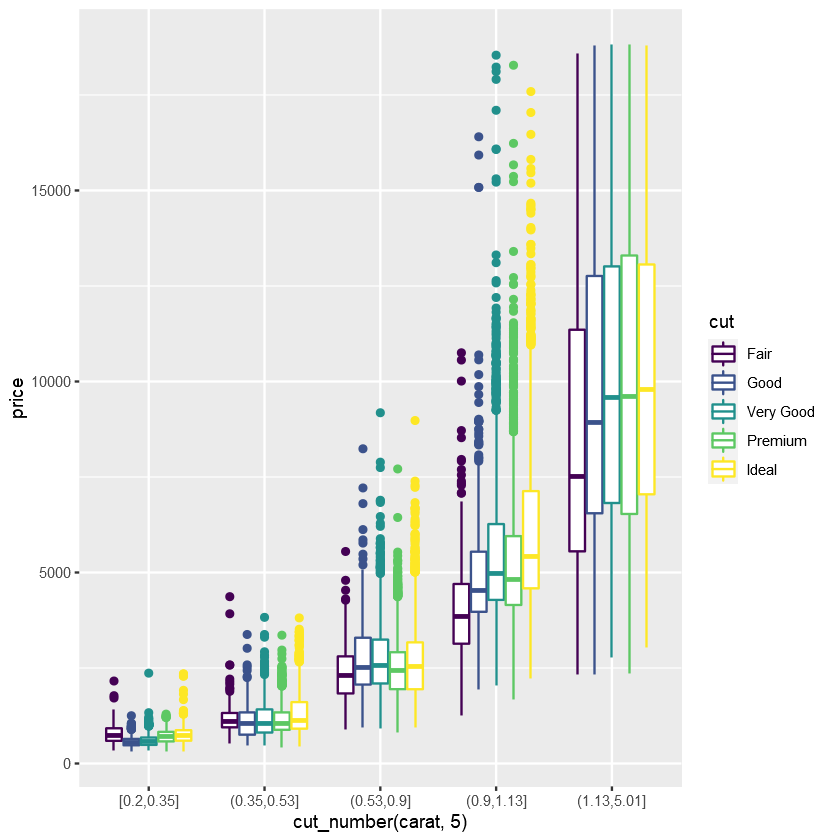

In [156]:
ggplot(diamonds, aes(x = cut_number(carat, 5), y = price, colour = cut)) +
  geom_boxplot()

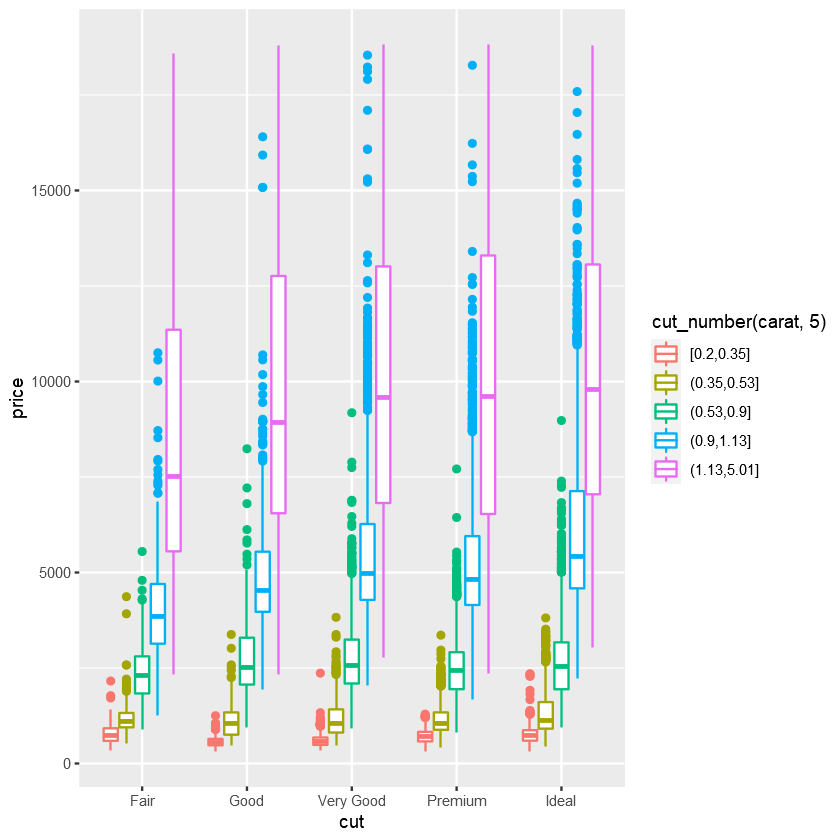

In [158]:
ggplot(diamonds, aes(colour = cut_number(carat, 5), y = price, x = cut)) +
  geom_boxplot()

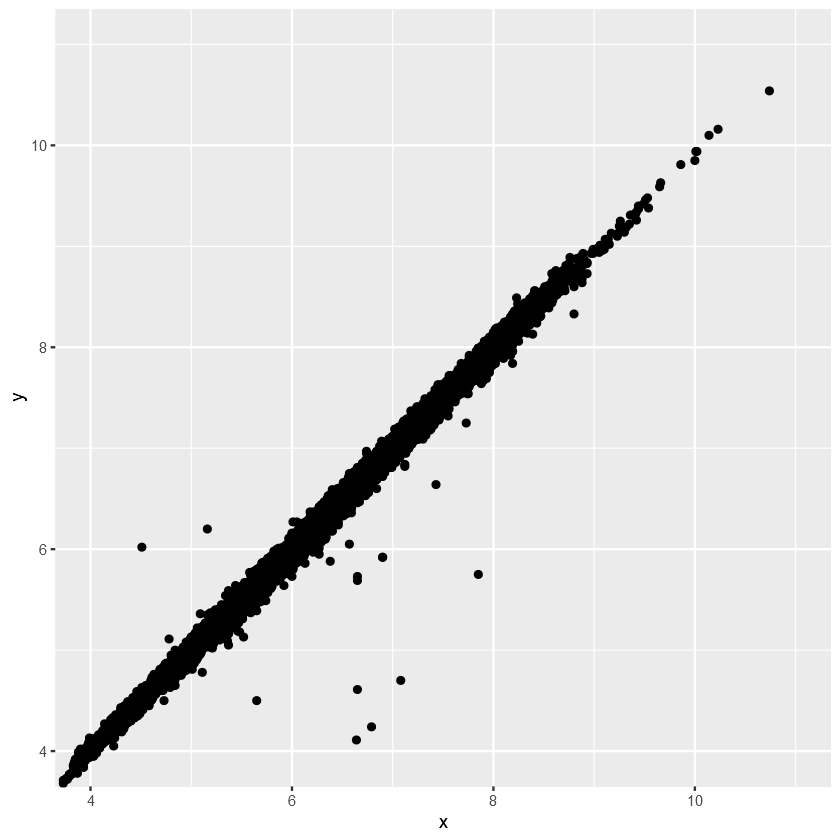

In [163]:
# 5
ggplot(diamonds, aes(x = x, y = y)) + geom_point() +
coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))

### 패턴과 모델

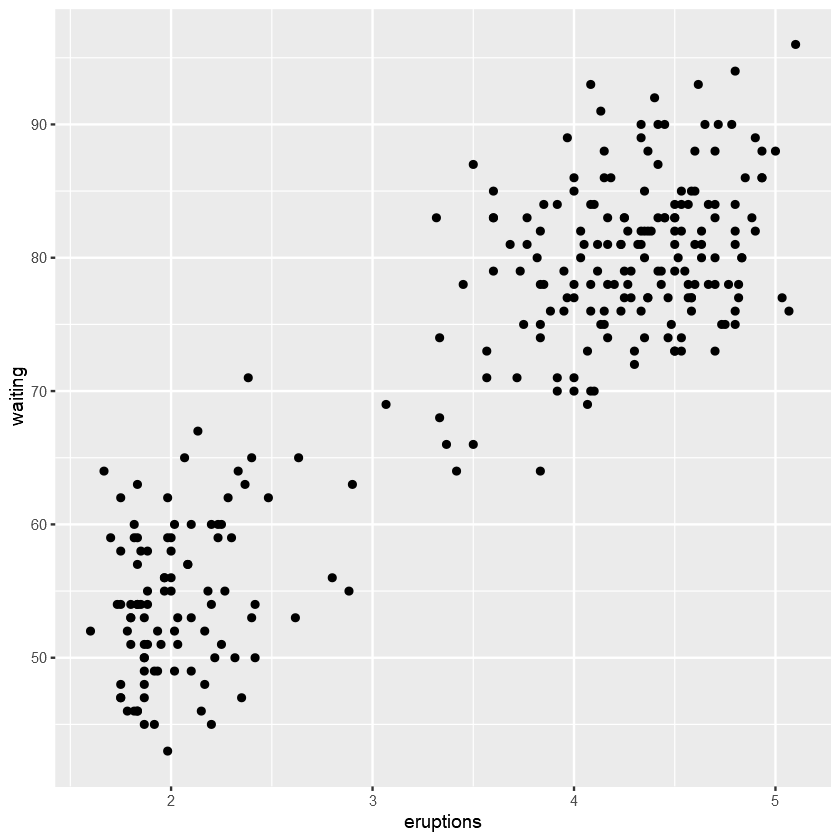

In [164]:
ggplot(faithful) + geom_point(aes(x = eruptions, y = waiting))

In [166]:
library(modelr)

mod <- lm(log(price) ~ log(carat), data = diamonds) 
summary(mod)


Call:
lm(formula = log(price) ~ log(carat), data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50833 -0.16951 -0.00591  0.16637  1.33793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.448661   0.001365  6190.9   <2e-16 ***
log(carat)  1.675817   0.001934   866.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2627 on 53938 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.933 
F-statistic: 7.51e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


In [167]:
diamonds2 <- diamonds %>% add_residuals(mod) %>% mutate(resid = exp(resid))
head(diamonds2)

carat,cut,color,clarity,depth,table,price,x,y,z,resid
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0.8196681
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0.9546565
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0.8221824
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0.5694586
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0.5107668
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0.7866561


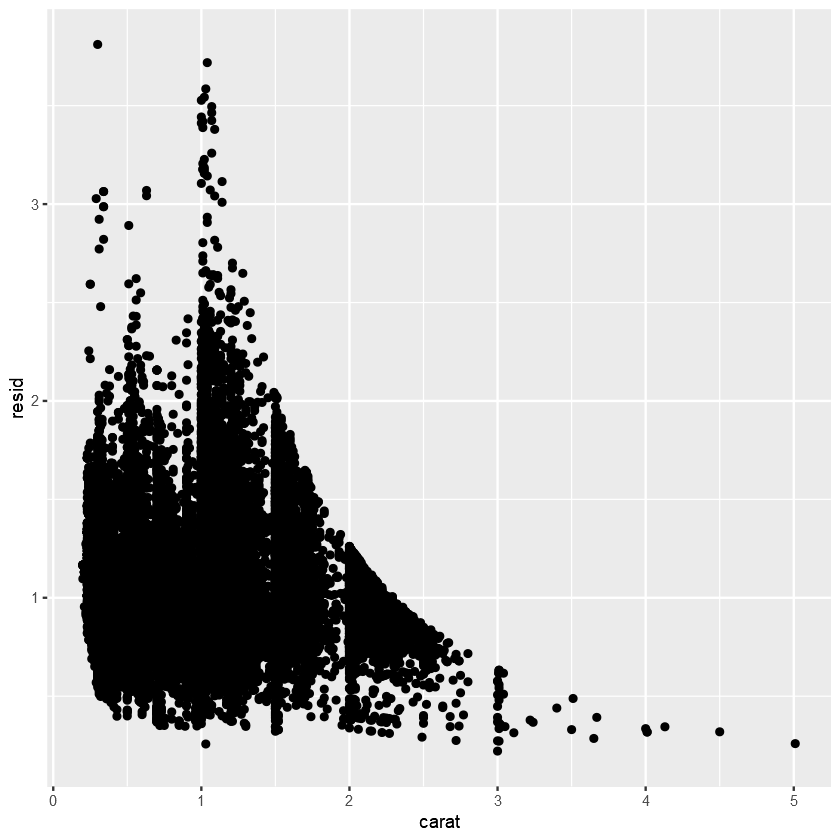

In [168]:
ggplot(diamonds2) + geom_point(aes(x = carat, y = resid))

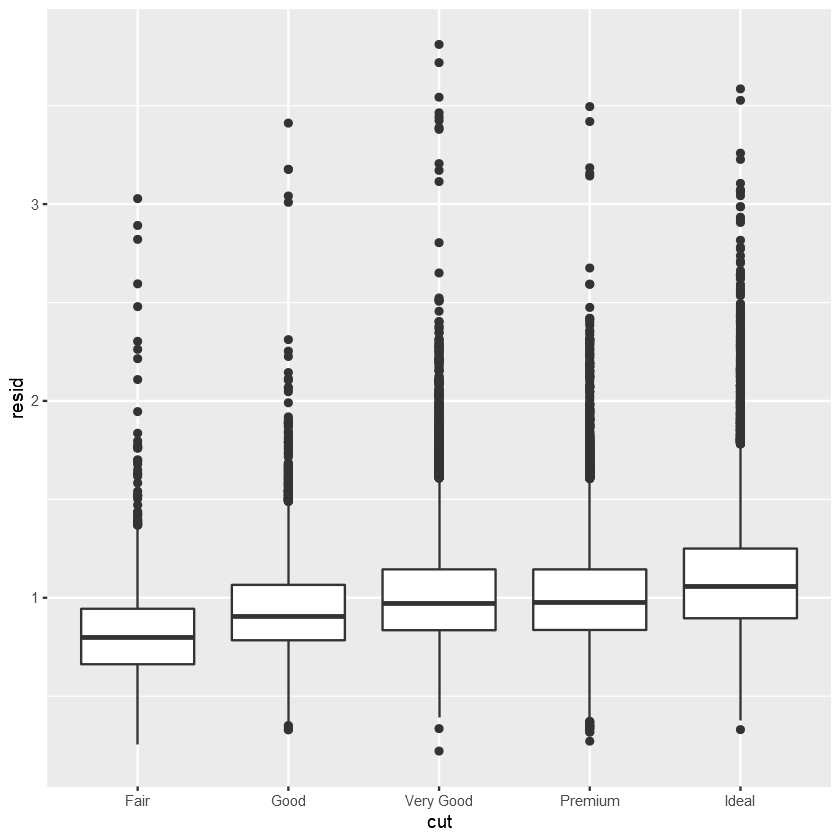

In [169]:
ggplot(diamonds2) + geom_boxplot(aes(x = cut, y = resid))